# MIE 1624 Introduction to Data Science and Analytics

## Course Project - Education Analytics

### Group 8: Bowen Xu, Chang Liu, Jianhui Li, Tianyi Yu, Xiaochen Sun, Zihao Jiao

# Table of Contents

## Part 1. Course Topics Desgin for MIE 1624
- 1.1 Web Scraping
    - Technical Jobs from Indeed
        - create skills dictionary
        - get urls from web pages
        - get links for each job and its html
        - get job_title, company and skills
    - Technical Jobs from Linkedin
    - Managerial Jobs from Indeed
    
    
- 1.2 Load Datasets


- 1.3 Job Skills Visualizations
    - Technical Jobs
    - Management Jobs
    - Hierarchical Clustering on Indeed and Linkedin Data
    - Hierarchical Clustering on technical skills
    - Hierarchical Clustering on management skills
    
- 1.4 Kaggle Survey Data Analysis
    - Skills
        - Programming Skills
        - Machine Learning Skills
        - Visualizations Tools
        - Big Data Skills
        - Data Types
        - Academic Achievements or Independent Project
    - Hierarchical Clustering on skills from Kaggle Survey


## Part 2. Master of Data Science and Artificial Intelligence Program Design

- 2.1 Web Scraping
    - Topics for Job Skills(Linear Algebra, Statistics, Python, Java, Excel, SQL, R, Scala, NLP)
    - Topics for Artificial Intelligence Division from Coursera
    - Topics for Business programs from 5 famous universities
        - Rotman Master of Management Analytics
        - Ivey Master of Business Analytics
        - Harvard Master of Business Analytics
        - Queens Master of Management Analytics
        - York Master of Management in Artificial Intelligence


- 2.2 Keywords and Justifications

- 2.3 Functions 

- 2.4 Course Design
    - 2.4.1 Data Science Courses
        - introduction to Data Science
        - Relational Databases
        - Introduction to Natrual Language Processing
        - Big Data Science
        - R Programming in Data Science
        - Excel for Business
        - Introduction to Web Development
    - 2.4.2 Artificial Intelligence
        - Applied Machine Learning
        - Introduction to Data Mining
        - Introduction to Cloud Computing in Big Data
        - Computer Vision
        - Decision Theory and Game Theory
        - Reinforcement Learning
    - 2.4.3 Business Analytics
        - Fundamentals of Project Management
        - Financial Risk Management
        - Data Warehousing for Business Intelligence
        - Analytics in Marketing
        - Managing Change
        - Leadership and Management 
        - Prescriptive analytics and Recomendation System
- 2.5 Project & Internship & ExtraCurricular Activities

## Part 4. Recommendation System for Course Selection
- 4.1 Introduction
- 4.2 Upload online course/section description, elective course and UofT course 
- 4.3 Build Information Retrieval(IR)
- 4.4 Build Recommendation System
     - 4.1.1 test for search topic related course
- 4.5 Questionnaire for student
     - Question 1: What kind of job do you want to find?          (eg. big data, machine learning, natural language          processing, ex...)
     - Question 2: What kind of programming language do          you want to learn? (eg. python, java, R, SQL,              ex...)
     - Question 3: What kind of skills do you need to            learn for your future career? (eg. visualization,          mathematics, SAS,...ex)
     - Question 4: What kind of management ability do you        need to learn for your future career? (eg. decision        making, teamwork, presentation, ...ex)
     - Question 5: What else knowledge do you want to            learn to improve yourself? (eg. you can type              nothing or linear optimization ex...)
- 4.6 Recommender System Results (Recommended courses)
     - 4.6.1 From Online Courses
     - 4.6.2 From detailed section of online courses
     - 4.6.3 From UofT elective courses at Emphasis in            Analytic
     - 4.6.4 From Our designed program courses
        
    

In [0]:
import re
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import nltk 
nltk.download('punkt')
from collections import Counter
from nltk import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
import string
from collections import OrderedDict

[nltk_data] Downloading package punkt to /Users/barry/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


# Part 1. Course Topics Design for MIE1624

## 1.1 Web Scraping

### 1.1.1Indeed (Technical Jobs)

#### Create Skills Dictionary

In [0]:
# dictionary with skills used to parse job descriptions, categories become columns in the resulting DataFrame
skills_keywords_dict = {
        # tech skills
        'Excel': ['Excel'],
        'Python': ['Python'],
        'R': ['R ', ' R ', 'R,', 'R/'], # 'R' surrounded by spaces and signs
        'Java': ['Java', 'JVM'],
        'Scala': ['Scala'],
        'C/C++': ['C/C++', 'C++', ' C '],   # 'C' surrounded by spaces and signs
        'MATLAB': ['MATLAB'],
        'SAS': ['SAS'],
        'SQL/databases': ['SQL', 'databases'],
        'Oracle':['Oracle'],
        'SPSS': ['SPSS'],
        'Stata': ['Stata'],
        'Machine Learning': ['Machine Learning', 'ML'],
        'Data Mining/Analytics': ['Data Mining', 'DM', 'Analytics'],
        'NLP': ['Natural Language Processing', 'NLP'],
        'Visualisation': ['Visualisation', 'Visualization'],
        'Big Data': ['Big Data', 'Spark', 'kafka', 'Hive',
                     'beam', 'Hadoop', 'MapReduce', 'Hbase',
                     'Coudera', 'Hortonworks'],
        'AWS Cloud': ['AWS'],
        'Probability': ['probablity', 'probability theory'],
        'Support Vector Machines': ['SVM', 'Support vector machines'],
        'Neural Networks': ['Neural Networks', 'ANN', 'MLP', 'CNN', 'Tensorflow', 'Keras', 'Theano'],
        'GCP': ['GCP'],
        'Jason': ['Jason'],
        'xml': ['xml'],
        'Azure': ['Azure'],
        'Google Cloud': ['Google Cloud'],
        'Mathematics': ['Mathematics'],
        'IBM': ['IBM'],
        'Algebra': ['Algebra'],
        'Statistics' :  ['Statistics'],
        'Operations research': ['Operations research'],
        'DevOps': ['DevOps', 'TDD', 'test-driven'],
        'Git':['GitHub', 'Git', 'version control'],
        # soft skills
        'presentation' : ['communication', 'presentation'],
        'management' : ['management', 'Data management'],
        'agile' : ['agile'],
        'SDLC' : ['SDLC', 'sdlc', 'software development', 'lifecycle'],
        'decision making' : ['decision making', 'decision analysis'],
        'problem solving': ['problem solving'],
        'Team building': ['Team leadership', 'team building'],
        'project_management': ['project management'],
        'leadership': ['leadership'],
        'consulting': ['consulting', 'consultant']
    }

#### Get urls from Indeed pages

In [0]:
# 20 job postings per page
def get_urls(url):
    # get html back
    html = requests.get(url)
    html = html.text
    soup = BeautifulSoup(html, 'lxml')

    # extract the number of search results
    nums = soup.find('div', {'id':'searchCount'}).text
    nums = int(nums.split()[3])

    # add the common part between all search pages
    base_url = "https://www.indeed.ca" + soup.find('div', {'class': 'pagination'}).find('a').get('href')[:-2]
    
    urls = []
    urls.append(base_url)
    for i in range(20, nums, 20):
        urls.append(base_url + str(i))
    
    return urls, nums

In [0]:
# url = 'https://ca.indeed.com/jobs?q=Data+scientist&l=Canada'
# urls, nums = get_urls(url)

#### Get link for each job and its html text

In [0]:
def get_job_links_info(urls):
    
    dic = {}
    # loop over all page-urls
    for page_url in urls:

        # get the HTML of the search results page
        page = requests.get(page_url)
        content = page.text
        soup = BeautifulSoup(content, 'lxml')

        # find all <div> tags containing each job posting links and feed them to the function 'scrape_job_info'
        results = soup.find_all('div',{'class': 'title'})

        for job in results:

            job_link = "https://www.indeed.ca" + job.find('a')['href']

            job_page = requests.get(job_link)
            job_content = job_page.text
            #soup_job = BeautifulSoup(job_content,'lxml')
            #job_desc = soup_job.find('div',{'class':"jobsearch-jobDescriptionText"}).get_text()
            dic[job_link] = job_content
            
    return dic

In [0]:
#info_dict = get_job_links_info(urls)

#### Get job_title, company_name, skills from info_dict

In [0]:
def get_skills_from_job(jobs_dict, skills_dict):
    
    results_dict = {} 
    
    # loop over all key(link)-value(HTML code) pairs in scraping results
    for link, job_html_text in jobs_dict.items():
        
    
        soup_job = BeautifulSoup(job_html_text, 'lxml')
        
        results_dict[link] = {} 
        
        # extract job title
        try:
            results_dict[link]['job_title'] = soup_job.find('h3', 
                                {'class':"icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title"}).text   
        except IndexError:
            results_dict[link]['job_title'] = 'Not found'
            
         # extract company name
        try:
            results_dict[link]['company_name'] = soup_job.find('div', 
                                                                   {'class': 'icl-u-lg-mr--sm icl-u-xs-mr--xs'}).text 
        except IndexError:
            results_dict[link]['company_name'] = 'Not found'
                
        # search for the skills
        job_text = soup_job.text
        for skill_category, skills in skills_dict.items():
            
            category_found = 0  
            
            for skill in skills:        
                if job_text.find(skill) != -1: 
                    
                    category_found = 1
            
            results_dict[link][skill_category] = category_found 
    
    return results_dict 

In [0]:
# results_dict = get_skills_from_job(info_dict, skills_keywords_dict)
#df_indeed = pd.DataFrame(results_dict).T.reset_index()

### 1.1.2 Linkedin (Technical Jobs)

In [0]:
# 20 job postings per page
def get_urls_linkedin(url):
    # get html back
    html = requests.get(url)
    html = html.text
    soup = BeautifulSoup(html, 'lxml')

    # extract the number of search results
    nums = soup.find('h1').find('span').text
    nums = int(nums)

    # add the common part between all search pages
    base_url = 'https://ca.linkedin.com/jobs/data-scientist-jobs?position=1&pageNum='
    
    urls = []
    for i in range(0, nums, 25):
        urls.append(base_url + str(i))
    
    return urls, nums

In [0]:
# url = "https://ca.linkedin.com/jobs/data-scientist-jobs"
# urls,nums = get_urls_linkedin(url)

In [0]:
def get_job_links_info_linkedin(urls):
    
    dic = {}
    # loop over all page-urls
    for page_url in urls:

        # get the HTML of the search results page
        page = requests.get(page_url)
        content = page.text
        soup = BeautifulSoup(content, 'lxml')

        # find all <div> tags containing each job posting links and feed them to the function 'scrape_job_info'
        results = soup.find_all('a',{'class':"result-card__full-card-link"})

        for job in results:

            job_link = job['href']

            job_page = requests.get(job_link)
            job_content = job_page.text
            #soup_job = BeautifulSoup(job_content,'lxml')
            #job_desc = soup_job.find('div',{'class':"jobsearch-jobDescriptionText"}).get_text()
            dic[job_link] = job_content
            
    return dic

In [0]:
#linkedin_dict = get_job_links_info_linkedin(urls)

In [0]:
def get_skills_from_job_linkedin(jobs_dict, skills_dict):
    
    results_dict = {} 
    
    # loop over all key(link)-value(HTML code) pairs in scraping results
    for link, job_html_text in jobs_dict.items():
        
    
        soup_job = BeautifulSoup(job_html_text, 'lxml')
        
        results_dict[link] = {} 
        
        # extract job title
        try:
            results_dict[link]['job_title'] = soup_job.find('h1',{'class':'topcard__title'}).text   
        except:
            results_dict[link]['job_title'] = 'Not found'
            
         # extract company name
        try:
            results_dict[link]['company_name'] = soup_job.find('a',{'class':'topcard__org-name-link topcard__flavor--black-link'}).text
        except:
            results_dict[link]['company_name'] = 'Not found'
                
        # search for the skills
        job_text = soup_job.text
        for skill_category, skills in skills_dict.items():
            
            category_found = 0  
            
            for skill in skills:        
                if job_text.find(skill) != -1: 
                    
                    category_found = 1
            
            results_dict[link][skill_category] = category_found 
    
    return results_dict 

In [0]:
# results_dict = get_skills_from_job_linkedin(linkedin_dict, skills_keywords_dict)
# df_linkedin = pd.DataFrame(results_dict).T.reset_index()

In [0]:
#df_linkedin.to_csv('tech_linkedin.csv')

In [0]:
#df_indeed

,index,job_title,company_name,Excel,Python,R,Java,Scala,C/C++,MATLAB,...,presentation,management,agile,SDLC,decision making,problem solving,Team building,project_management,leadership,consulting
0,https://www.indeed.ca/pagead/clk?mo=r&ad=-6NYl...,Senior Data Scientist,BMO Financial Group,1,1,1,0,0,0,0,...,1,1,0,0,0,1,0,0,0,0
1,https://www.indeed.ca/pagead/clk?mo=r&ad=-6NYl...,Data Engineer,Prodigy Game,0,1,0,1,1,0,0,...,1,1,0,0,0,0,0,1,0,0
2,https://www.indeed.ca/pagead/clk?mo=r&ad=-6NYl...,"Business Development, Data Science and Analytics",Blackline Safety,1,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,1
3,https://www.indeed.ca/pagead/clk?mo=r&ad=-6NYl...,DATA SCIENTIST,Allstate Canada,1,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,https://www.indeed.ca/pagead/clk?mo=r&ad=-6NYl...,Big Data Instructor,"Cestar College of Business, Health & Technology",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
672,https://www.indeed.ca/pagead/clk?mo=r&ad=-6NYl...,Big Data Instructor,"Cestar College of Business, Health & Technology",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
673,https://www.indeed.ca/pagead/clk?mo=r&ad=-6NYl...,Business Intelligence Analyst (Power BI),TCU Financial Group,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
674,https://www.indeed.ca/pagead/clk?mo=r&ad=-6NYl...,Data Engineer,Prodigy Game,0,1,0,1,1,0,0,...,1,1,0,0,0,0,0,1,0,0
675,https://www.indeed.ca/pagead/clk?mo=r&ad=-6NYl...,DATA SCIENTIST,Allstate Canada,1,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [0]:
#df_tech = df_indeed.append(df_linkedin,ignore_index=True)

In [0]:
#df_tech

,index,job_title,company_name,Excel,Python,R,Java,Scala,C/C++,MATLAB,...,presentation,management,agile,SDLC,decision making,problem solving,Team building,project_management,leadership,consulting
0,https://www.indeed.ca/pagead/clk?mo=r&ad=-6NYl...,Senior Data Scientist,BMO Financial Group,1,1,1,0,0,0,0,...,1,1,0,0,0,1,0,0,0,0
1,https://www.indeed.ca/pagead/clk?mo=r&ad=-6NYl...,Data Engineer,Prodigy Game,0,1,0,1,1,0,0,...,1,1,0,0,0,0,0,1,0,0
2,https://www.indeed.ca/pagead/clk?mo=r&ad=-6NYl...,"Business Development, Data Science and Analytics",Blackline Safety,1,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,1
3,https://www.indeed.ca/pagead/clk?mo=r&ad=-6NYl...,DATA SCIENTIST,Allstate Canada,1,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,https://www.indeed.ca/pagead/clk?mo=r&ad=-6NYl...,Big Data Instructor,"Cestar College of Business, Health & Technology",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,https://ca.linkedin.com/jobs/view/senior-data-...,Senior Data Scientist - Multiple Roles,Shopify,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1466,https://ca.linkedin.com/jobs/view/data-scienti...,Data Scientist,CGI,0,1,1,1,1,0,0,...,1,0,0,1,0,0,0,0,0,0
1467,https://ca.linkedin.com/jobs/view/data-analyst...,Data Analyst,OMERS,0,0,0,0,0,0,0,...,1,1,0,1,1,0,0,0,0,0
1468,https://ca.linkedin.com/jobs/view/data-scienti...,Data Scientist | VC-backed | Fast Growing SaaS...,Process Street,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [0]:
#df_tech.to_csv('technical_job.csv')

### 1.1.3 Indeed (Management Jobs)

#### Get urls from Indeed pages

In [0]:
# 20 job postings per page
def get_urls(url):
    nums = 1000
    # get html back
    html = requests.get(url)
    html = html.text
    soup = BeautifulSoup(html, 'lxml')

    # add the common part between all search pages
    base_url = "https://www.indeed.ca" + soup.find('div', {'class': 'pagination'}).find('a').get('href')[:-2]
    
    urls = []
    urls.append(base_url)
    for i in range(10, nums, 10):
        urls.append(base_url + str(i))
    
    return urls, nums

In [0]:
# url = 'https://ca.indeed.com/jobs?q=data+manager&l=Canada'
# urls, nums = get_urls(url)

#### Get link for each job and its html text

In [0]:
def get_job_links_info(urls):
    
    dic = {}
    # loop over all page-urls
    for page_url in urls:

        # get the HTML of the search results page
        page = requests.get(page_url)
        content = page.text
        soup = BeautifulSoup(content, 'lxml')

        # find all <div> tags containing each job posting links and feed them to the function 'scrape_job_info'
        results = soup.find_all('div',{'class': 'title'})

        for job in results:

            job_link = "https://www.indeed.ca" + job.find('a')['href']

            job_page = requests.get(job_link)
            job_content = job_page.text
            #soup_job = BeautifulSoup(job_content,'lxml')
            #job_desc = soup_job.find('div',{'class':"jobsearch-jobDescriptionText"}).get_text()
            dic[job_link] = job_content 
    return dic

In [0]:
#info_dict = get_job_links_info(urls)

#### Get job_title, company_name, skills from info_dict

In [0]:
def get_skills_from_job(jobs_dict, skills_dict):
    
    results_dict = {} 
    
    # loop over all key(link)-value(HTML code) pairs in scraping results
    for link, job_html_text in jobs_dict.items():
        
    
        soup_job = BeautifulSoup(job_html_text, 'lxml')
        
        results_dict[link] = {} 
        
        # extract job title
        try:
            results_dict[link]['job_title'] = soup_job.find('h3', 
                                {'class':"icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title"}).text   
        except IndexError:
            results_dict[link]['job_title'] = 'Not found'
            
         # extract company name
        try:
            results_dict[link]['company_name'] = soup_job.find('div', 
                                                                   {'class': 'icl-u-lg-mr--sm icl-u-xs-mr--xs'}).text 
        except IndexError:
            results_dict[link]['company_name'] = 'Not found'
                
        # search for the skills
        job_text = soup_job.text
        for skill_category, skills in skills_dict.items():
            
            category_found = 0  
            
            for skill in skills:        
                if job_text.find(skill) != -1: 
                    
                    category_found = 1
            
            results_dict[link][skill_category] = category_found 
    
    return results_dict 

In [0]:
# results_dict = get_skills_from_job(info_dict, skills_keywords_dict)
# df_mng = pd.DataFrame(results_dict).T.reset_index()

In [0]:
#df_mng

,index,job_title,company_name,Excel,Python,R,Java,Scala,C/C++,MATLAB,...,presentation,management,agile,SDLC,decision making,problem solving,Team building,project_management,leadership,consulting
0,https://www.indeed.ca/pagead/clk?mo=r&ad=-6NYl...,Lead Data Manager (Canada),PRA Health Sciences,0,0,0,0,0,0,0,...,1,1,0,1,0,0,0,0,0,0
1,https://www.indeed.ca/pagead/clk?mo=r&ad=-6NYl...,Facility Operation and Maintenance Manager (NO...,Vale Canada Ltd,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,https://www.indeed.ca/pagead/clk?mo=r&ad=-6NYl...,YouTube Channel Manager,Viral Nation Inc.,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
3,https://www.indeed.ca/pagead/clk?mo=r&ad=-6NYl...,"Retention Manager, Digital Product Management",OLG,1,0,0,0,0,0,0,...,1,1,0,0,0,0,0,1,0,0
4,https://www.indeed.ca/pagead/clk?mo=r&ad=-6NYl...,Fleet Manager,Pineapple Express Delivery,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,https://www.indeed.ca/pagead/clk?mo=r&ad=-6NYl...,"Data Industrialization, Processing & Methods A...",Gemalto Canada Inc.,1,0,0,0,0,0,0,...,1,1,0,1,0,0,0,0,0,0
1711,https://www.indeed.ca/pagead/clk?mo=r&ad=-6NYl...,Telesales Manager,Merchant 1 Payments,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1712,https://www.indeed.ca/pagead/clk?mo=r&ad=-6NYl...,Channel Account Manager- Remote,Johnson Controls,1,0,0,0,0,0,0,...,1,1,0,0,0,1,0,0,1,0
1713,https://www.indeed.ca/pagead/clk?mo=r&ad=-6NYl...,Facility Operation and Maintenance Manager (NO...,Vale Canada Ltd,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [0]:
#df_mng.to_csv('management_jobs.csv')

## 1.2 Load Data

In [0]:
technical_data = pd.read_csv('technical_job.csv')
technical_data.drop(columns=['Unnamed: 0','index'],inplace=True)

In [0]:
management_jobs = pd.read_csv('management_jobs.csv')
management_jobs.drop(columns=['Unnamed: 0','index'],inplace=True)

## 1.3 Job Skills Visualizations

### 1.3.1 Technical Jobs

Excluding the broad skills such as data science, it appears that the most demanded skills in technical jobs are machine learning, python, and presentation. Which is reasonable as python is one of the most adapted platform to perform machine learning on, and presentation is especially important when the results of machine learning is translated from a technical standpoint to business language for the company to decide on business operation issues.

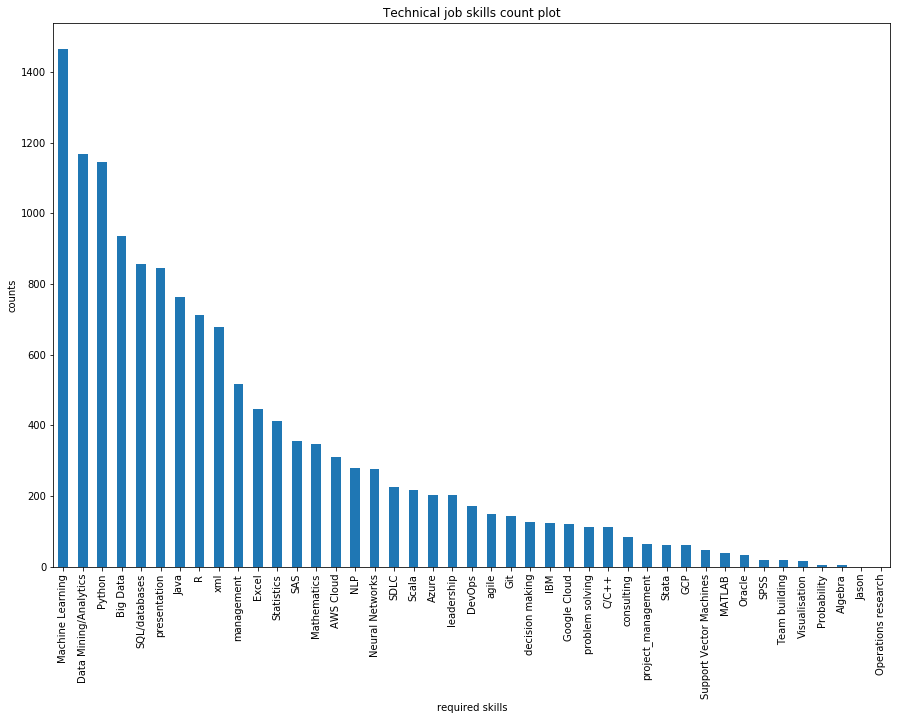

In [0]:
df_sum = technical_data.sum(numeric_only=True).sort_values(ascending=False)
plt.figure(figsize=(15,10))
df_sum.plot.bar()
plt.title('Technical job skills count plot')
plt.xlabel('required skills')
plt.ylabel('counts')
plt.show()

### 1.3.2 Management Jobs

This graph illustrates the most demanding skills of management job posting dataset, it worth to mention that except some identical tehcnical skills, there are also some soft skills, such as: presentation, leadership, proble solving, consulting skills required in managegrial job.

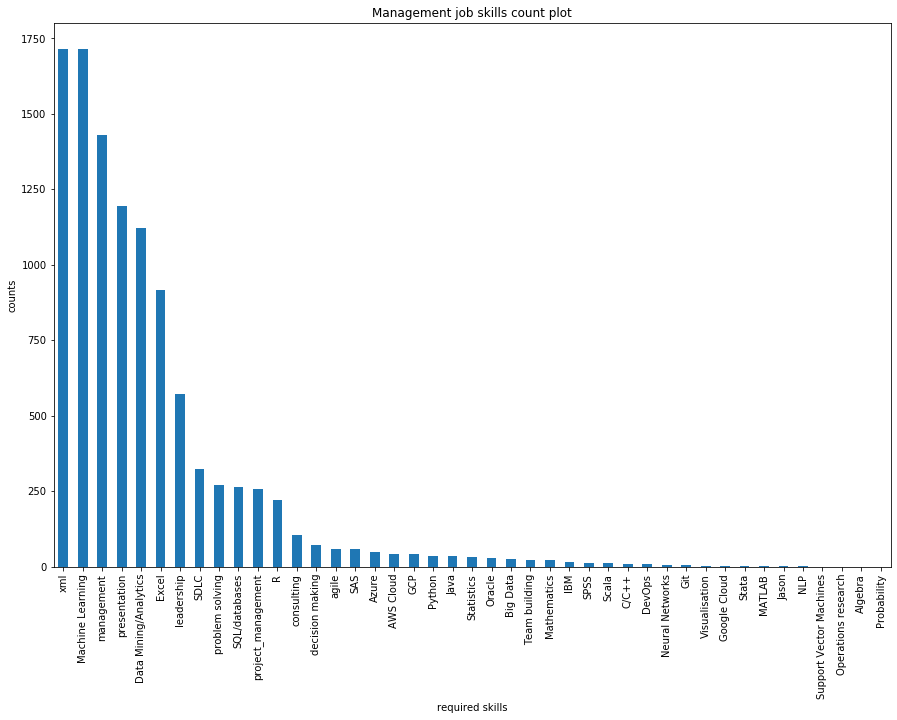

In [0]:
df_sum = management_jobs.sum(numeric_only=True).sort_values(ascending=False)
plt.figure(figsize=(15,10))
df_sum.plot.bar()
plt.title('Management job skills count plot')
plt.xlabel('required skills')
plt.ylabel('counts')
plt.show()

### 1.3.3 Hierarchical clustering on Indeed and Linkedin Data

The code below will combine two datasets together, then plot a hierarchcal clustering plot to further develop each skills internal relationship.

In [0]:
df = pd.concat([technical_data, management_jobs], axis=0)
X = df.iloc[:, 2:].values

I manually divided the skills into two groups: soft skills and technical skills, I will perform Hierarchical clustering for them respectively, to find out what skills related to the other.

In [0]:
skill_soft = ['presentation', 'management','decision making', 'problem solving', 'Team building', 
              'problem solving', 'project_management', 'leadership', 'consulting']

skill_tech = ['Excel', 'Python', 'R', 'Java', 'Scala',
       'C/C++', 'MATLAB', 'SAS', 'SQL/databases', 'Oracle', 'SPSS', 'Stata',
       'Machine Learning', 'Data Mining/Analytics', 'NLP', 'Visualisation',
       'Big Data', 'AWS Cloud', 'Probability', 'Support Vector Machines',
       'Neural Networks', 'GCP', 'Jason', 'xml', 'Azure', 'Google Cloud',
       'Mathematics', 'IBM', 'Algebra', 'Statistics', 'Operations research',
       'DevOps', 'Git', 'agile', 'SDLC']

df_soft = df[skill_soft]
df_tech = df[skill_tech]

### 1.3.4 Hieratchical Clustering on Technical Skills

This graph shows the technical skills hieratchical clustering result.

In [0]:
X_tech = df_tech.values

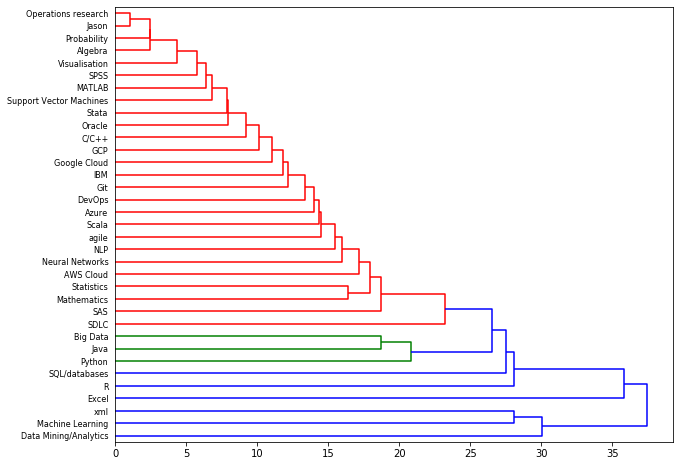

In [0]:
skill_tech = df_tech.columns.values
fig, ax = plt.subplots(1,1, figsize=(10, 8))
z = linkage(X_tech.T)
dn = dendrogram(z, orientation='right')
labels = skill_tech[dn['leaves']]
ax.set_yticklabels(labels)
plt.show()

The clustering results has grouped the topics in to three major categories. For group 1 (in red), skills such as neural net, NLP, and mathematics are very specific skillsets for artificial intelligence. Group 2 (in green), are the tools oftenly used to process and perform machine learning with, and group 3 (blue) are the skills that are used for querying and analysing results. Therefore, it is relatively safe to say that a person is very likely to get a technical job is he/she knows how to build or use AI, with a popular platform, and is able to analyze, or transporting them in or out of a database.

### 1.3.5 Hieratchical Clustering on Management Skills 

This graph shows managerial skills hieratchical clustering result.

In [0]:
X_soft = df_soft.values

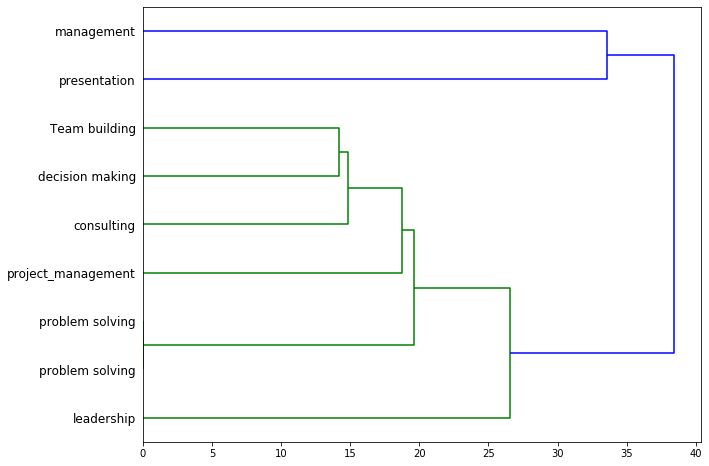

In [0]:
skill_manag= df_soft.columns.values
fig, ax = plt.subplots(1,1, figsize=(10, 8))
z = linkage(X_soft.T)
dn = dendrogram(z, orientation='right')
labels = skill_manag[dn['leaves']]
ax.set_yticklabels(labels)
plt.show()

The skills for management falls into 2 simple categories. The green clusters are generally skills that are needed within a group, while the blue clusters are skills that seems to output the results from the group work. 

## 1.4 kaggle survey Data analysis

In order to finalize the course topic for MIE1624, we will also look at Kagge dataset as it engaged many surveyees who working in data related industry. The responses of them will provide us robust support.

In [0]:
kaggle = pd.read_csv('multipleChoiceResponses.csv')

/Users/barry/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (0,2,8,10,21,23,24,25,26,27,28,44,56,64,83,85,87,107,109,123,125,150,157,172,174,194,210,218,219,223,246,249,262,264,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,304,306,325,326,329,341,368,371,384,385,389,390,391,393,394) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Although the clustering results were able to show some level of pattern for the topics grouped together, they were not the grouping that was initially expected. Furthermore, it is rather difficult to have a clear distinction between a programming skill, a modeling skill, or a analysis skill with the current cluster result. Therefore, with the clustering result as a reference, we further categorised the results in to the following sections.

Programming Skills: Python and SQL are the most popular languages amongst all other language used for data science.

Machine Learning Skills: SKlearn provides a vast number of libraries and has made machine learning very easy to implement, while tensorflow is one of the most popular neural netword building tools used in industry and research.

Visualisaion Tools: Due to the popularity of Python, matplotlib and seaborn are two of the most popular tools used for result visualisation.

Types of Data: Numerical data is the most widely used data type as most of the data, regardless categorical or sequencial, falls in to this category as it is very simple to process and can be fitted into models directly.

Academic Achievement or Independent Project: It has shown that people widely believe that a independent project is more important than academic achievement. This may due to the fact that a project is more reflective on the person's overall ability to plan, to manage, and to carry out certain tasks in order to complete a certain goal.

### 1.4.1 Skills

The function below will scan entire kaggle dataset to extract the surveyees' responses, who only engaged in data related jobs. 
A pre-selected job title:
  
    ['Data Scientist' , 'Data Analyst' , 'Business Analyst' , 'Data Engineer' ,'DBA/Database Engineer' , 'Marketing Analyst' , 'Data Journalist']

will be our filter to pick up surveyee who only work on data related jobs. This list comes from column 6(job title) in kaggle dataset.

The output of this function is a dictionary, keys are skills, values are count for each skill.

In [0]:
def skill_extraction(data_related_jobtitle, shape, filter1, dataset, start_col, end_col):

    i = 1
    skill_set = []
    while i < shape:
        scan_1 = dataset.iloc[i][filter1]
        scan_1 = str(scan_1)
        scan_1 = word_tokenize(scan_1.lower())#scan_1 return job title
        if scan_1 in data_related_jobtitle:# if one specific job title in job list, do following
            for column in dataset.columns[start_col:end_col]:
                scan_2 = dataset.iloc[i][column]
                scan_2 = str(scan_2)
                if scan_2 != 'nan':
                        skill_set.append(scan_2)
        i += 1
    return dict(Counter(skill_set))

#### programming skills

In kaggle dataset, column 65 to column 83 belongs to one question: which programming language you used at most at regular bases. By calling previuous skill_extraction function, we can extract all programming skills and counts of each skill.

In [0]:
data_job=[word_tokenize(x.lower()) for x in ['Data Scientist' , 'Data Analyst' , 'Business Analyst' , 'Data Engineer' ,'DBA/Database Engineer' , 'Marketing Analyst' , 'Data Journalist']]
programming_skills_data_job = skill_extraction(data_job, kaggle.shape[0], 'Q6' , kaggle, 65, 83)
programming_skills_data_job_sorted = OrderedDict(sorted(programming_skills_data_job.items(), key=lambda x: x[1]))
programming_skills_data_job_sorted

OrderedDict([('Julia', 73),
             ('Ruby', 77),
             ('None', 80),
             ('Go', 112),
             ('Other', 161),
             ('PHP', 240),
             ('C#/.NET', 380),
             ('Scala', 439),
             ('SAS/STATA', 517),
             ('Visual Basic/VBA', 553),
             ('MATLAB', 561),
             ('Javascript/Typescript', 773),
             ('C/C++', 799),
             ('Java', 889),
             ('Bash', 1067),
             ('R', 3061),
             ('SQL', 3885),
             ('Python', 5710)])

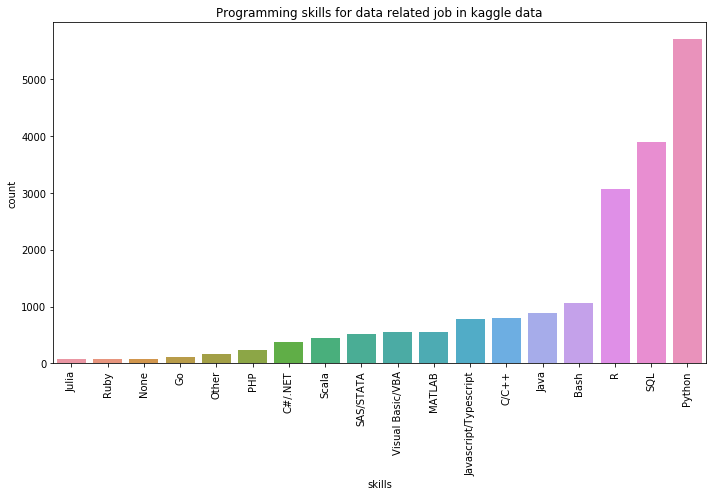

In [0]:
plt.figure(figsize=(10,7))
g = sns.barplot(x =list(programming_skills_data_job_sorted.keys()),y =list(programming_skills_data_job_sorted.values())).set(title = 'Programming skills for data related job in kaggle data',
                                                                                                         xlabel='skills',ylabel='count')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

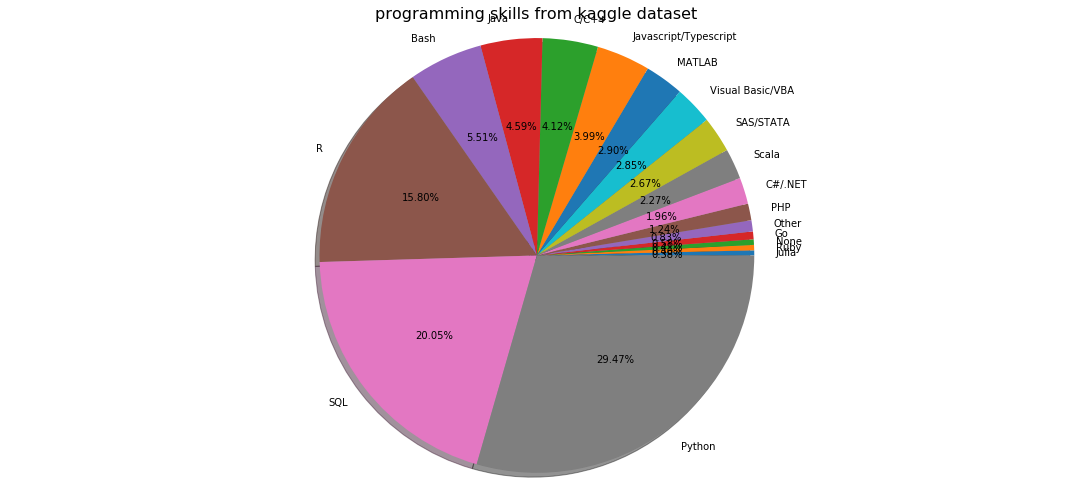

In [0]:
labels = list(programming_skills_data_job_sorted.keys())
sizes = list(programming_skills_data_job_sorted.values())
fig1, ax1 = plt.subplots(figsize=(15,7))
ax1.pie(sizes, labels=labels, autopct='%1.2f%%', shadow=True)
ax1.axis('equal') 
fig = plt.gcf()
plt.title('programming skills from kaggle dataset', fontsize=16)
plt.tight_layout()
plt.show()

The results shows that python and SQL are the top two most popular skills, both of them nearly take up 50%.

#### machine learning skills

Column 88 to column 107 asked surveyee which machine learning skill they use at most, similar process by calling skill_extraction function, we can get all machine learning related skills and counts of them.

In [0]:
data_job=[word_tokenize(x.lower()) for x in ['Data Scientist' , 'Data Analyst' , 'Business Analyst' , 'Data Engineer' ,'DBA/Database Engineer' , 'Marketing Analyst' , 'Data Journalist']]
ml_skills = skill_extraction(data_job, kaggle.shape[0], 'Q6', kaggle, 88, 107)
ml_skills_sorted = OrderedDict(sorted(ml_skills.items(), key=lambda x: x[1]))

ml_skills_sorted

OrderedDict([('Other', 170),
             ('Mxnet', 275),
             ('mlr', 312),
             ('CNTK', 334),
             ('Caffe', 351),
             ('Fastai', 469),
             ('Prophet', 486),
             ('catboost', 588),
             ('None', 775),
             ('H20', 805),
             ('lightgbm', 1123),
             ('Spark MLlib', 1156),
             ('Caret', 1312),
             ('PyTorch', 1350),
             ('Xgboost', 2886),
             ('randomForest', 2953),
             ('Keras', 3086),
             ('TensorFlow', 3518),
             ('Scikit-Learn', 4830)])

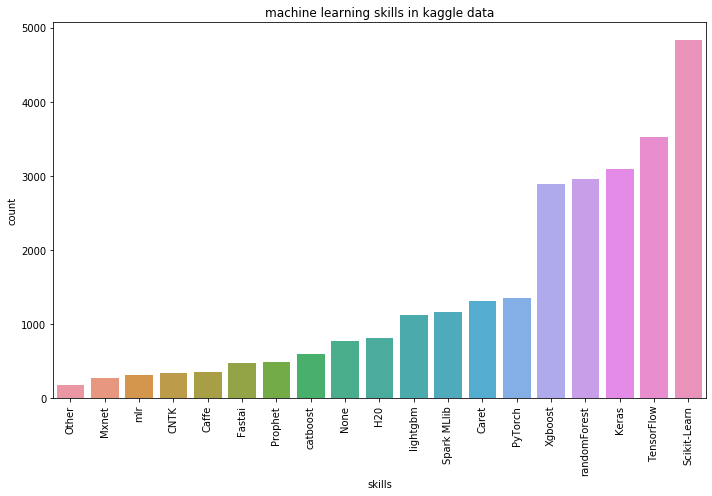

In [0]:
plt.figure(figsize=(10,7))
g = sns.barplot(x =list(ml_skills_sorted.keys()),y =list(ml_skills_sorted.values())).set(title = 'machine learning skills in kaggle data',
                                                                                                         xlabel='skills',ylabel='count')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

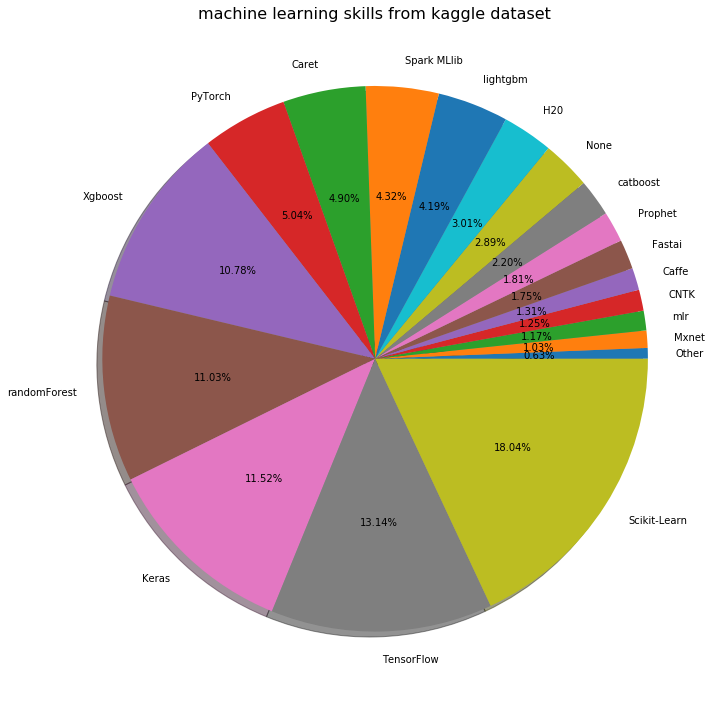

In [0]:
labels = list(ml_skills_sorted.keys())
sizes = list(ml_skills_sorted.values())
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.2f%%', shadow=True)
ax1.axis('equal') 
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('machine learning skills from kaggle dataset', fontsize=16)
plt.tight_layout()
plt.show()

It shows that Scikit-Learn was the most popular skills, followed by tensorflow, keras.

#### Visualisation tools

Column 110 to column 123 in kaggle dataset asked surveyee which visualisation tool they used at most.

In [0]:
data_job=[word_tokenize(x.lower()) for x in ['Data Scientist' , 'Data Analyst' , 'Business Analyst' , 'Data Engineer' ,'DBA/Database Engineer' , 'Marketing Analyst' , 'Data Journalist']]
data_visual_skills = skill_extraction(data_job, kaggle.shape[0], 'Q6', kaggle, 110, 123)
data_visual_skills_sorted = OrderedDict(sorted(data_visual_skills.items(), key=lambda x: x[1]))
data_visual_skills_sorted

OrderedDict([('Altair', 108),
             ('Other', 194),
             ('Geoplotlib', 332),
             ('None', 423),
             ('Lattice', 431),
             ('Leaflet', 533),
             ('D3', 986),
             ('Bokeh', 992),
             ('Shiny', 1515),
             ('Plotly', 2698),
             ('Seaborn', 3461),
             ('ggplot2', 3618),
             ('Matplotlib', 4903)])

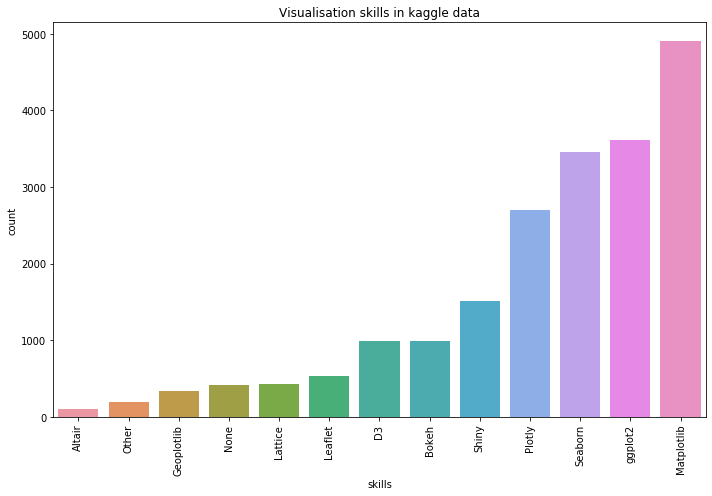

In [0]:
plt.figure(figsize=(10,7))
g = sns.barplot(x =list(data_visual_skills_sorted.keys()),y =list(data_visual_skills_sorted.values())).set(title = 'Visualisation skills in kaggle data',
                                                                                                         xlabel='skills',ylabel='count')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

It not surperise that top 1 is Matplotlib, ggplot2, seaborn, they are all based on the most popular programming skill(python).

#### Big Data skill

Column 224 to column 247 in kagge dataset asked surveyees what big data skill they encountered most at their daily job.

In [0]:
data_job=[word_tokenize(x.lower()) for x in ['Data Scientist' , 'Data Analyst' , 'Business Analyst' , 'Data Engineer' ,'DBA/Database Engineer' , 'Marketing Analyst' , 'Data Journalist']]
bigdata_skills = skill_extraction(data_job, kaggle.shape[0], 'Q6', kaggle, 224, 247)
bigdata_skills_sorted = OrderedDict(sorted(bigdata_skills.items(), key=lambda x: x[1]))
bigdata_skills_sorted

OrderedDict([('SAP IQ', 24),
             ('IBM Cloud Streaming Analytics', 28),
             ('IBM InfoSphere DataStorage', 28),
             ('IBM Cloud Analytics Engine', 58),
             ('Oracle Warehouse Builder', 69),
             ('Azure Stream Analytics', 94),
             ('AWS Batch', 102),
             ('Google Cloud Dataprep', 103),
             ('Google Cloud Dataproc', 118),
             ('Oracle Exadata', 118),
             ('Google Cloud Pub/Sub', 128),
             ('Snowflake', 149),
             ('Azure HDInsight', 152),
             ('AWS Kinesis', 157),
             ('Azure SQL Data Warehouse', 164),
             ('Google Cloud Dataflow', 187),
             ('AWS Athena', 218),
             ('Microsoft Analysis Services', 225),
             ('AWS Elastic MapReduce', 331),
             ('Teradata', 382),
             ('Databricks', 522),
             ('AWS Redshift', 612),
             ('Google BigQuery', 653)])

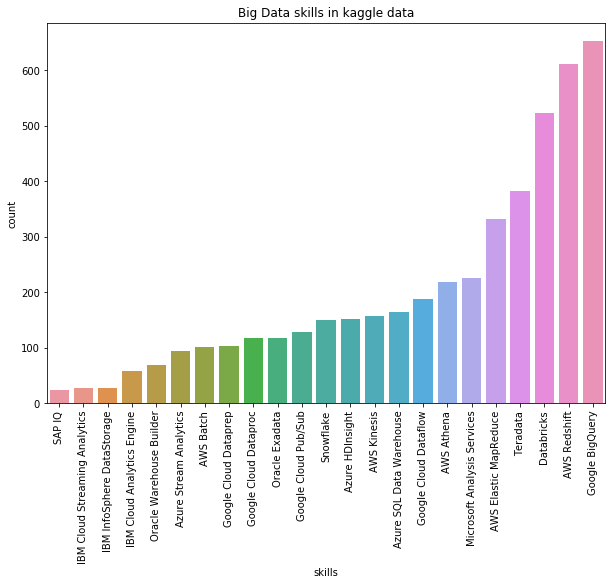

In [0]:
plt.figure(figsize=(10,7))
g = sns.barplot(x =list(bigdata_skills_sorted.keys()),y =list(bigdata_skills_sorted.values())).set(title = 'Big Data skills in kaggle data',
                                                                                                         xlabel='skills',ylabel='count')
plt.xticks(rotation = 90)
plt.show()

The bar chart above shows that each big data skill count plot, Google BigQuery is the most popular big data skill.

####  Types of data

Column 250 to column 260 in kaggle dataset asked surveyees which types of data they are working on mostly in their job.

In [0]:
data_job=[word_tokenize(x.lower()) for x in ['Data Scientist' , 'Data Analyst' , 'Business Analyst' , 'Data Engineer' ,'DBA/Database Engineer' , 'Marketing Analyst' , 'Data Journalist']]
typedata_skills = skill_extraction(data_job, kaggle.shape[0], 'Q6', kaggle, 250, 260)
typedata_skills_sorted = OrderedDict(sorted(typedata_skills.items(), key=lambda x: x[1]))
typedata_skills_sorted

OrderedDict([('Audio Data', 270),
             ('Genetic Data', 342),
             ('Sensor Data', 879),
             ('Geospatial Data', 1058),
             ('Image Data', 1464),
             ('Tabular Data', 3373),
             ('Text Data', 3487),
             ('Time Series Data', 3525),
             ('Categorical Data', 3742),
             ('Numerical Data', 4568)])

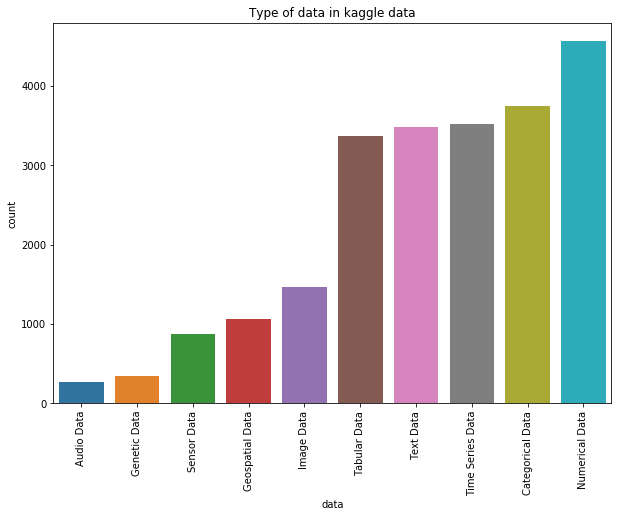

In [0]:
plt.figure(figsize=(10,7))
g = sns.barplot(x =list(typedata_skills_sorted.keys()),y =list(typedata_skills_sorted.values())).set(title = 'Type of data in kaggle data',
                                                                                                         xlabel='data',ylabel='count')
plt.xticks(rotation = 90)
plt.show()

The bar chart shows that, numerical data is the most frequently data type in data science job, the next four data types (Categorical, Time series, Text data, Tabular data) are nearly equal.

#### Academic achievements or independent projects

Column 40 asked people what their opinion about independent project compare to academic achievements.

In [0]:
kaggle.Q40.value_counts()

Independent projects are much more important than academic achievements                                              4990
Independent projects are slightly more important than academic achievements                                          4473
Independent projects are equally important as academic achievements                                                  4343
No opinion; I do not know                                                                                             936
Independent projects are slightly less important than academic achievements                                           831
Independent projects are much less important than academic achievements                                               306
Which better demonstrates expertise in data science: academic achievements or independent projects? - Your views:       1
Name: Q40, dtype: int64

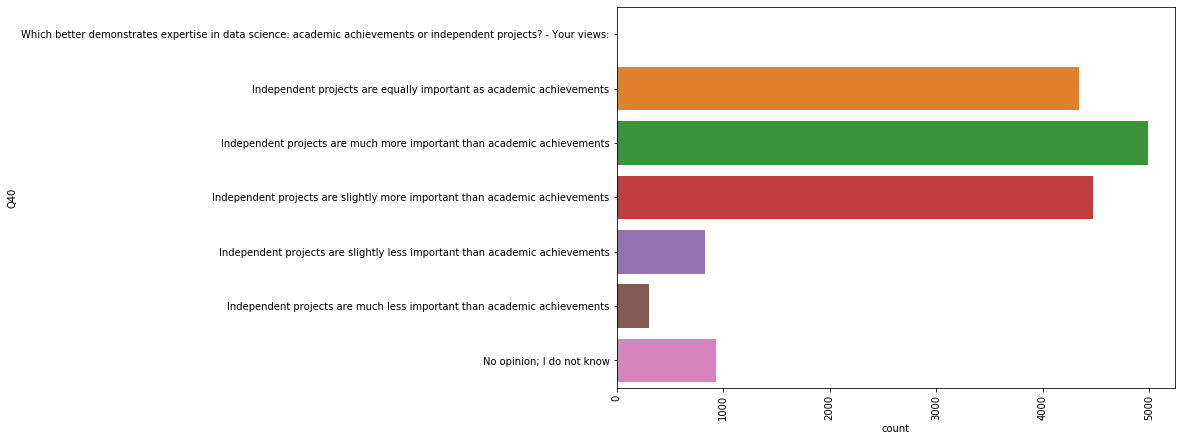

In [0]:
plt.figure(figsize=(10,7))
sns.countplot(y='Q40',data=kaggle)
plt.xticks(rotation = 90)
plt.show()

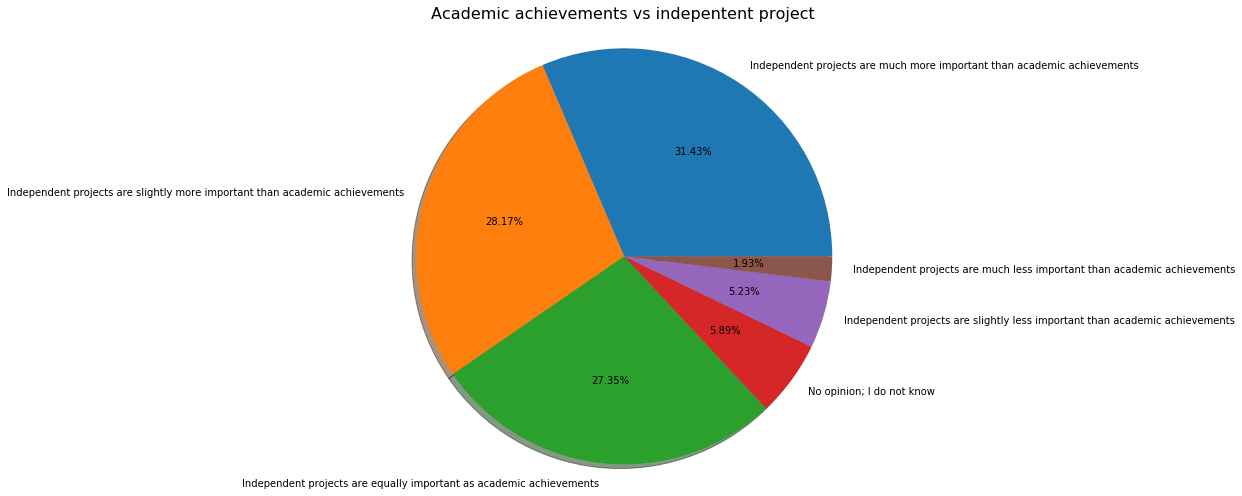

In [0]:
labels = list(kaggle.Q40.value_counts().keys()[0:6])
sizes = list(kaggle.Q40.value_counts()[0:6])
fig1, ax1 = plt.subplots(figsize=(15,7))
ax1.pie(sizes, labels=labels, autopct='%1.2f%%', shadow=True)
#ax1.pie(sizes, autopct='%1.2f%%', shadow=True)
ax1.axis('equal') 
fig = plt.gcf()
plt.title('Academic achievements vs indepentent project', fontsize=16)
plt.tight_layout()
plt.show()

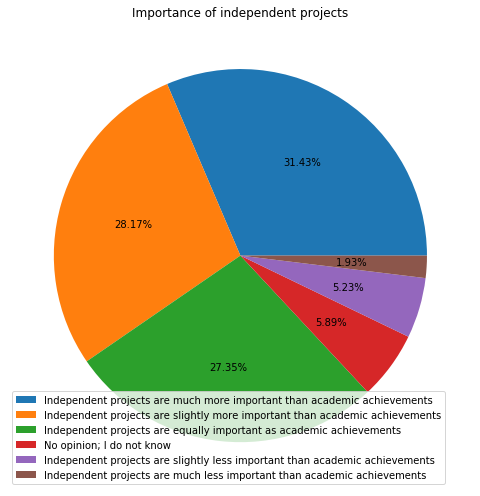

In [0]:
labels = list(kaggle.Q40.value_counts().keys()[0:6])
sizes = list(kaggle.Q40.value_counts()[0:6])
fig1, ax1 = plt.subplots(figsize=(10,7))
ax1.pie(sizes, autopct='%1.2f%%')
plt.title('Importance of independent projects')
plt.legend(labels,loc=3)
plt.tight_layout()
plt.show()

Around 31% people think independent projects are much more important than academic achievement.

### 1.4.2 Hierarchical clustering on Skills from Kaggle Survey

The function below will scan column ['Q11', 'Q14', 'Q15', 'Q16', 'Q19', 'Q21', 'Q31', 'Q47'], these questions were assumed to be the most relevant to the desing of course curriculum. 

The output of this cell will be a data frame, each column is a skill filled by etheir 0  or 1, further we will use this dataframe to perform clustering analysis, its rows representing the survey respondents.

In [0]:
min_records = kaggle.shape[0]
responses = kaggle.drop(0)
iteration = 0
for question in ['Q11', 'Q14', 'Q15', 'Q16', 'Q19', 'Q21', 'Q31', 'Q47']:
    # get a list of columns that contain this question
    question_cols = [col for col in responses.columns if question in col]
    question_subset = responses[question_cols].copy()
    answer_categories = []
    for column in question_subset.columns:
        answer_categories.append(kaggle.iloc[0].loc[column].split(' - ')[-1])
        question_subset[column] = question_subset[column].str.replace(re.escape(answer_categories[-1]), '1')
        question_subset[column] = question_subset[column].fillna(0)
        if question_subset[column].value_counts().loc[0] > min_records:
            question_subset = question_subset.drop(column, axis=1)
            answer_categories.pop()
        else:
            question_subset[column] = question_subset[column].astype('int')
    question_subset.columns = answer_categories
    iteration += 1
    if iteration ==1:
        questions_df = question_subset
    else:
        questions_df = pd.concat([questions_df, question_subset], axis=1)

A dataframe that contains all skill extracted, filled in ehtheir 0 or 1 represent the skills for each respondents, it is used to obtain an Hierarchical Clustering dendrogram that visualizes how each of the skills relate to one another. This is used to assist us in combining the skills in the same, or close, clusters together to inform decision about designing our curriculum.

From the original 396 columns in Kaggle survey, the final list of features includes 52 skills.

In [0]:
print("found required skills as follow: \n\n",questions_df.columns)

found required skills as follow: 

 Index(['Analyze and understand data to influence product or business decisions',
       'Build and/or run a machine learning service that operationally improves my product or workflows',
       'Build and/or run the data infrastructure that my business uses for storing, analyzing, and operationalizing data',
       'Build prototypes to explore applying machine learning to new areas',
       'Do research that advances the state of the art of machine learning',
       'Kaggle Kernels', 'Google Colab', 'Azure Notebook', 'Domino Datalab',
       'Google Cloud Datalab', 'Paperspace', 'Floydhub', 'Crestle',
       'JupyterHub/Binder', 'Google Cloud Platform (GCP)',
       'Amazon Web Services (AWS)', 'Microsoft Azure', 'IBM Cloud',
       'Alibaba Cloud', 'Python', 'R', 'SQL', 'Bash', 'Java',
       'Javascript/Typescript', 'Visual Basic/VBA', 'C/C++', 'MATLAB', 'Scala',
       'Julia', 'Go', 'C#/.NET', 'PHP', 'Ruby', 'SAS/STATA', 'Scikit-Learn',
       'T

I manually divided the 52 skills into two groups: skill platform which contains all coding and working platforms, and skill_tech_minority, which contains some advanced skills or minority skills that we dont often used in data science job.

These two group will further grouped into two skills, various_platforms and minority skills, by doing this, we can reduce unnecessary and huge outputs of hierarchical clustering.

In [0]:
skill_platform = ['Google Colab', 'Azure Notebook', 'Domino Datalab',
                  'Google Cloud Datalab', 'Paperspace', 'Floydhub', 'Crestle',
                  'JupyterHub/Binder', 'Google Cloud Platform (GCP)',
                  'Amazon Web Services (AWS)', 'Microsoft Azure', 'IBM Cloud',
                  'Alibaba Cloud']


skill_tech_minority = ['LIME functions','ELI5 functions', 'SHAP functions','H20', 'Fastai',
                  'Mxnet', 'Caret','mlr', 'Prophet','lightgbm','Leaflet', 'Lattice', 'Julia', 
                  'Go', 'C#/.NET', 'PHP', 'Ruby', 'SAS/STATA','Altair', 'Shiny', 'D3', 'Plotly',
                   'Bokeh','catboost', 'CNTK', 'Caffe', 'ggplot2']


df_regular = questions_df



df_minority = questions_df[skill_tech_minority]
df_platform = questions_df[skill_platform]



df_regular['various_platforms'] = (df_platform.sum(axis=1)>0)*1
df_regular['minority_skill'] = (df_minority.sum(axis=1)>0)*1


df_regular.drop(skill_platform,axis=1,inplace = True)
df_regular.drop(skill_tech_minority,axis=1,inplace=True)
X_tech = df_regular.values

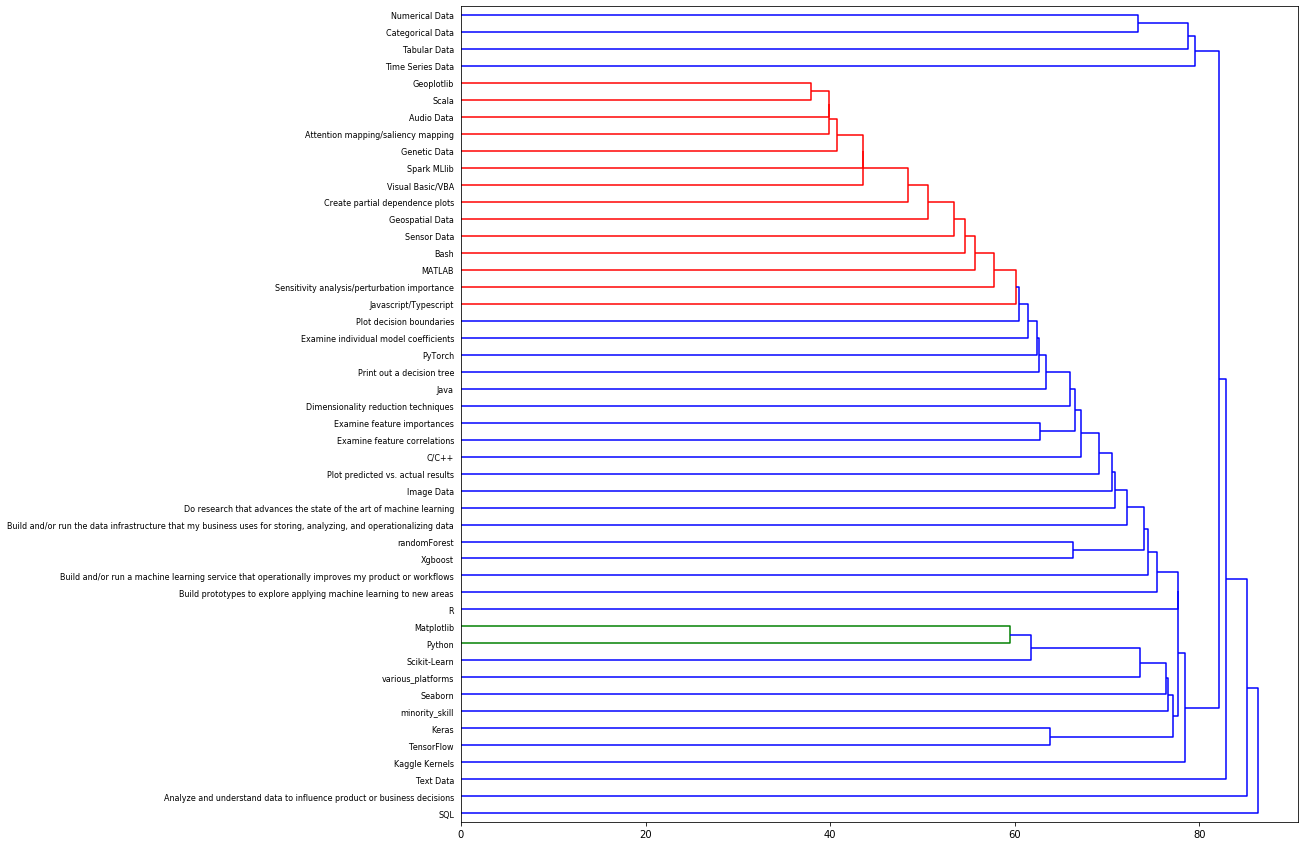

In [0]:
skill_tech = df_regular.columns.values
fig, ax = plt.subplots(1,1, figsize=(15, 15))
z = linkage(X_tech.T)
dn = dendrogram(z, orientation='right')
labels = skill_tech[dn['leaves']]
ax.set_yticklabels(labels)
plt.show()

# Part 2. MDSAI Program Desgin

## 2.1 Web Scraping

### 1. Topics from Job Skills (linear algebra, statistics, python, java, excel, SQL, R, Scala, NLP)

Since Part 1 only used skills for the course MIE1624 only, some of the skills or topics can have much deeper meanings which are worth to investigate more on them and generate some courses for that skill. Also, those skills are not included in MIE1624 will be extracted as well. In summary, the skills are listed in the title. 

For each skill, it's searched on Coursera website and a number of 100 courses and their descriptions are extracted; inside each course, there are several chapters and corresponding chapter descriptions; each chapter are then divided into some sections withj descriptions. The logic for below code is:

- 1. Get the urls for each web page, each web page contains 10-15 courses;
- 2. for each urls in step 1: extract the course names and save it into a list, then retrieve the address of the course's website and save it to another list;
- 3. In each course website, get the course descriptions and chapter names. Automatic web scraping is used by "selenium' package, since the chapters are not shown if nobody clicks the 'show more' button, a Chrome web driver could help to solve this problem. The Xpath for the button is copied and clicked everytime the system gets into the course website. Then course length(number of chapters), chapter names and chapter links are recoded, respectively;
- 4. For each chapter link, there are several sections in the chapter, all section names, section length(number of sections) and section descriptions are recorded into two lists, respectively;
- 5. Finally, the first dataframe includes section names, section length, chapter links and section descriptions are included, the second dataframe includes the course name, course length, course description, chapter names and chapter links. In total, two dataframes are returned for each topic (section_topics.csv and chapter_topics.csv)

In [0]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
import time

In [0]:
driver = webdriver.Chrome(ChromeDriverManager().install())


Looking for [chromedriver 80.0.3987.106 mac64] driver in cache 
File found in cache by path [/Users/barry/.wdm/drivers/chromedriver/80.0.3987.106/mac64/chromedriver]


In [0]:
# 20 job postings per page
def get_urls(url):
    
    nums = 15
    # get html back
    html = requests.get(url)
    html = html.text
    soup = BeautifulSoup(html, 'lxml')

    # add the common part between all search pages
    base_url = 'https://www.coursera.org/search?query=excel&indices%5Bprod_all_products_term_optimization%5D%5Bpage%5D=1&indices%5Bprod_all_products_term_optimization%5D%5Bconfigure%5D%5BclickAnalytics%5D=true&indices%5Bprod_all_products_term_optimization%5D%5Bconfigure%5D%5BruleContexts%5D%5B0%5D=en&indices%5Bprod_all_products_term_optimization%5D%5Bconfigure%5D%5BhitsPerPage%5D=10&configure%5BclickAnalytics%5D=true'
    urls = []
    urls.append(base_url)
    for i in range(2, nums):
        a = 'https://www.coursera.org/search?query=excel&indices%5Bprod_all_products_term_optimization%5D%5Bpage%5D=' + str(i) + '&indices%5Bprod_all_products_term_optimization%5D%5Bconfigure%5D%5BclickAnalytics%5D=true&indices%5Bprod_all_products_term_optimization%5D%5Bconfigure%5D%5BruleContexts%5D%5B0%5D=en&indices%5Bprod_all_products_term_optimization%5D%5Bconfigure%5D%5BhitsPerPage%5D=10&configure%5BclickAnalytics%5D=true'
        urls.append(a)
        
    return urls

In [0]:
#urls = get_urls('https://www.coursera.org/search?query=excel&')

In [0]:
# page = requests.get(urls[0])
# content = page.text
# soup = BeautifulSoup(content, 'lxml')
# a = soup.find_all('li',{'class':'ais-InfiniteHits-item'})
# for b in a:
#     c = 'https://www.coursera.org' + b.find('a')['href']
#     print(c)

https://www.coursera.org/specializations/excel
https://www.coursera.org/learn/excel-para-negocios
https://www.coursera.org/learn/excel-essentials
https://www.coursera.org/learn/competencias-digitales-ofimatica
https://www.coursera.org/learn/excel-intermediate-1
https://www.coursera.org/learn/excel-aplicado-negocios-avanzado
https://www.coursera.org/learn/excel-data-analysis
https://www.coursera.org/specializations/excel-mysql
https://www.coursera.org/learn/excel-analysis
https://www.coursera.org/learn/excel-advanced


In [0]:
# course_links, course_desc = [],[]
# # loop over all page-urls
# for page_url in urls:

#     # get the HTML of the search results page
#     page = requests.get(page_url)
#     content = page.text
#     soup = BeautifulSoup(content, 'lxml')

#     results = soup.find_all('li',{'class':'ais-InfiniteHits-item'})

#     for course in results:

#         course_link = 'https://www.coursera.org' + course.find('a')['href']
        
#         #description
#         course = requests.get(course_link)
#         course_soup = BeautifulSoup(course.text, 'lxml')
#         try:
#             desc = course_soup.find('div',{'class':'description'}).text
#         except:
#             desc = 'No Descriptions'
#         course_desc.append(desc)
        
#         course_links.append(course_link)

In [0]:
# #chapter links
# course_len,course_names,chapter_names,chapter_links = [],[],[],[]
# for link in course_links:
    
#     page = requests.get(link)
#     content = page.text
#     soup = BeautifulSoup(content, 'lxml')
    
#     course_names.append(soup.find('h1').text)
#     #click buttons and generate full_link to further operations
#     driver.get(link)
#     time.sleep(5)
#     try:
#         button = driver.find_element_by_xpath('//*[@id="main"]/div/div[6]/div/div/div[2]/ul/li/div[2]/button/span')
#         button.click()
#         all_link = driver.page_source
#     except:
#         all_link = driver.page_source
    
#     course_soup = BeautifulSoup(all_link, 'lxml')
    
#     #course chapters names
#     chapters = course_soup.find_all('h3',{'class':"headline-3-text bold m-t-1 m-b-2"})
#     for i in chapters:
#         chapter_names.append(i.text)
    
#     #chapter links
#     a = course_soup.find_all('div',{'class':'Row_nvwp6p CourseItem'})
#     course_len.append(len(a))
#     for b in a:
#         chapter_links.append('https://www.coursera.org' + b.find('a',{'data-e2e':"course-link"})['href'])

In [0]:
# #section names and description
# section_len = []

# for link in chapter_links:
#     driver.get(link)
#     time.sleep(5)
#     try:
#         buttons = driver.find_element_by_xpath('//*[@id="expand_module_description_button"]')
#         buttons.click()
#         full_link = driver.page_source
#     except:
#         full_link = driver.page_source
        
#     chapter_soup = BeautifulSoup(full_link, 'lxml')
    
#     #names and len
#     a = chapter_soup.find_all('h2',{'class':'headline-2-text bold m-b-2'})
#     section_len.append(len(a))

In [0]:
# section_names,section_desc = [],[]
# for link in chapter_links:
#     driver.get(link)
#     time.sleep(5)
#     try:
#         buttons = driver.find_element_by_xpath('//*[@id="expand_module_description_button"]')
#         buttons.click()
#         full_link = driver.page_source
#     except:
#         full_link = driver.page_source
        
#     chapter_soup = BeautifulSoup(full_link, 'lxml')
    
#     a = chapter_soup.find_all('h2',{'class':'headline-2-text bold m-b-2'})
    
#     #names
#     for b in a:
#         section_names.append(b.text)
    
#     #desc
#     c = chapter_soup.find_all('div',{'class':'content-inner'})[-len(a):]
#     for d in c:
#         section_desc.append(d.text)

In [0]:
# df_section = pd.DataFrame({'Section Names':section_names,'Section Descriptions':section_desc})
# df_section

,Section Names,Section Descriptions
0,Critical Core of Excel,"In this module, you will learn about key found..."
1,Performing calculations,The syntax of formulas is very important in Ex...
2,Formatting,Formatting helps to highlight key messages and...
3,Working with Data,This module is all about working with data – a...
4,Printing,Sometimes you need to print your spreadsheets ...
...,...,...
504,The Regulatory Environment and the Future of F...,"Given this is a new technology, regulators nee..."
505,"Introduction to R, Data Retrieval, and Return ...",This module goes over the versions of R (R Stu...
506,Risk Management under Normal Distributions,This module covers how to calculate value-at-r...
507,Risk Management under Non-normal Distributions,This module covers how to test for normality o...


In [0]:
#df_section.insert(1,'Section Length','')

In [0]:
#df_section.insert(2,'Chapter Links','')

In [0]:
# a = 0
# for i in range(len(section_len)):
#     num = section_len[i]
#     link = chapter_links[i]
#     df_section.iloc[a:a+num,1] = num
#     df_section.iloc[a:a+num,2] = link
#     a += num

In [0]:
#df_section

,Section Names,Section Length,Chapter Links,Section Descriptions
0,Critical Core of Excel,7,https://www.coursera.org/learn/excel-essentials,"In this module, you will learn about key found..."
1,Performing calculations,7,https://www.coursera.org/learn/excel-essentials,The syntax of formulas is very important in Ex...
2,Formatting,7,https://www.coursera.org/learn/excel-essentials,Formatting helps to highlight key messages and...
3,Working with Data,7,https://www.coursera.org/learn/excel-essentials,This module is all about working with data – a...
4,Printing,7,https://www.coursera.org/learn/excel-essentials,Sometimes you need to print your spreadsheets ...
...,...,...,...,...
504,The Regulatory Environment and the Future of F...,8,https://www.coursera.org/learn/blockchain-busi...,"Given this is a new technology, regulators nee..."
505,"Introduction to R, Data Retrieval, and Return ...",4,https://www.coursera.org/learn/financial-risk-...,This module goes over the versions of R (R Stu...
506,Risk Management under Normal Distributions,4,https://www.coursera.org/learn/financial-risk-...,This module covers how to calculate value-at-r...
507,Risk Management under Non-normal Distributions,4,https://www.coursera.org/learn/financial-risk-...,This module covers how to test for normality o...


In [0]:
#df_course = pd.DataFrame({'Course Names':course_names,'Course Length':course_len,'Course Descriptions':course_desc})

In [0]:
#df_chapter = pd.DataFrame({'Chapter Names':chapter_names,'Chapter Links':chapter_links})

In [0]:
# df_chapter.insert(0,'Course Names','')
# df_chapter.insert(1,'Course Length','')
# df_chapter.insert(2,'Course Descriptions','')

In [0]:
# a = 0
# for i in range(len(df_course)):
#     num = df_course.iloc[i,1]
#     df_chapter.iloc[a:a+num,0] = df_course.iloc[i,0]
#     df_chapter.iloc[a:a+num,1] = df_course.iloc[i,1]
#     df_chapter.iloc[a:a+num,2] = df_course.iloc[i,2]
#     a += num

In [0]:
#df_chapter

,Course Names,Course Length,Course Descriptions,Chapter Names,Chapter Links
0,Excel Skills for Business Specialization,4,This specialization is intended for anyone who...,Excel Skills for Business: Essentials,https://www.coursera.org/learn/excel-essentials
1,Excel Skills for Business Specialization,4,This specialization is intended for anyone who...,Excel Skills for Business: Intermediate I,https://www.coursera.org/learn/excel-intermedi...
2,Excel Skills for Business Specialization,4,This specialization is intended for anyone who...,Excel Skills for Business: Intermediate II,https://www.coursera.org/learn/excel-intermedi...
3,Excel Skills for Business Specialization,4,This specialization is intended for anyone who...,Excel Skills for Business: Advanced,https://www.coursera.org/learn/excel-advanced
4,Excel to MySQL: Analytic Techniques for Busine...,4,"Formulate data questions, explore and visualiz...",Business Metrics for Data-Driven Companies,https://www.coursera.org/learn/analytics-busin...
...,...,...,...,...,...
101,"Effective Communication: Writing, Design, and ...",4,Over seventy companies and tens of thousands o...,Effective Communication Capstone Project,https://www.coursera.org/learn/effective-commu...
102,Entrepreneurial Finance: Strategy and Innovati...,4,"From entrepreneurs to executives, this Special...",Startup Valuation Methods,https://www.coursera.org/learn/startup-valuati...
103,Entrepreneurial Finance: Strategy and Innovati...,4,"From entrepreneurs to executives, this Special...",Financing for Startup Businesses,https://www.coursera.org/learn/financing-start...
104,Entrepreneurial Finance: Strategy and Innovati...,4,"From entrepreneurs to executives, this Special...",Blockchain Business Models,https://www.coursera.org/learn/blockchain-busi...


In [0]:
#df_section.to_csv('section_topics_excel.csv')

In [0]:
#df_chapter.to_csv('chapter_topics_excel.csv')

### Topics from AI courses

Datasets for Artificial Intelligence are extracted in the similar way as shown above (Topics from Part 1). First 25 pages of websites in Coursera are scraped and returned two datasets as 'section_topics_ai.csv' and 'chapter_topics_ai.csv'.

### Topics from Business Analytics from 5 universities

For business-oriented courses, courses and their descriptions are scraped from the official websites of 5 different universities which include Rotman Business School (Master of Management Anslytics), Ivey Business School(Master of Business Analytics), Harvard University (Master of Business Analytics), Smith Business School (Master of Management Analytics) and Schulich School of Business (Master of Management in Artificial Intelligence). Five dataframes are combined together to get the 'university_course.csv'

In [0]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
import time

In [0]:
driver = webdriver.Chrome(ChromeDriverManager().install())

##### Rotman MMA

In [0]:
#The GET method indicates that you’re trying to get or retrieve data from a specified resource.
request = requests.get('https://www.rotman.utoronto.ca/Degrees/MastersPrograms/MMA/TheProgram/CourseDescriptions')
content = request.text
soup = BeautifulSoup(content, 'lxml')

In [0]:
courses_rotman = soup.find_all('h3')
courses_rotman_list = []
for i in courses_rotman:
    courses_rotman_list.append(i.get_text())
del courses_rotman_list[0]

In [0]:
courses_rotman_list

['Analytics in Management (RSM8901)',
 'Data-Based Management Decisions (RSM8502)',
 'Analytics Colloquia (RSM8431)',
 'Management Analytics Practicum (RSM8432)',
 'Structuring and Visualizing Data for Analytics (RSM8411)',
 'Modeling Tools for Predictive Analytics (RSM8512)',
 'Big Data Analytics (RSM8413)',
 'Tools for Probabilistic Models and Prescriptive Analytics (RSM8414)',
 'Leveraging AI and Deep Learning Tools in Marketing (RSM8521)',
 'Analytics for Marketing Strategy (RSM8522)',
 'Analytic Insights using Accounting and Financial Data (RSM8224)',
 'Optimizing Supply Chain Management and Logistics (RSM8423)\xa0']

In [0]:
a = soup.find_all('div',attrs={'class':'accordionPane'})
courses_description_rotman = []
for b in a:
    c = b.text
    d = c.strip('\n').split('\n')[1:]
    course_desc = (' ').join(d)
    courses_description_rotman.append(str(course_desc))

In [0]:
rotman_Courses = pd.DataFrame({'course': courses_rotman_list,
                           'courses_description':courses_description_rotman})

In [0]:
rotman_Courses

,course,courses_description
0,Analytics in Management (RSM8901),This course will introduce the students to the...
1,Data-Based Management Decisions (RSM8502),The goal of this course is to introduce the st...
2,Analytics Colloquia (RSM8431),The course will be composed of short modules ...
3,Management Analytics Practicum (RSM8432),"In this practicum course, you will learn how t..."
4,Structuring and Visualizing Data for Analytics...,This course will expose the learner to a broad...
5,Modeling Tools for Predictive Analytics (RSM8512),This course provides a hands-on introduction t...
6,Big Data Analytics (RSM8413),This course will introduce the students to a d...
7,Tools for Probabilistic Models and Prescriptiv...,The emphasis of the course will be on systemat...
8,Leveraging AI and Deep Learning Tools in Marke...,This course will cover some of the latest adva...
9,Analytics for Marketing Strategy (RSM8522),This course is about how to use data to answer...


##### Ivey Business Analytics

In [0]:
url = 'https://www.ivey.uwo.ca/msc/program-overview/business-analytics/'
request = requests.get(url)
content = request.text
soup = BeautifulSoup(content, 'lxml')

In [0]:
a = soup.find_all('div',{'class':'g-pa-30'})
c = []
for b in a:
    c.append(b.find_all('a'))

In [0]:
del c[4]

In [0]:
course_ivey_list, course_links = [],[]
for i in range(len(c)):
    for d in c[i]:
        course_ivey_list.append(d.text)
        link = 'https://www.ivey.uwo.ca' + d['href']
        course_links.append(link)

In [0]:
del course_ivey_list[7]
del course_links[7]

In [0]:
courses_description_ivey = []
for link in course_links:
    page = requests.get(link)
    content = page.text
    soup = BeautifulSoup(content, 'lxml')
    try:
        desc = soup.find('p',{'class':'lead'}).text
    except:
        desc = 'No Description'
    courses_description_ivey.append(desc)

In [0]:
ivey_Courses = pd.DataFrame({'course': course_ivey_list,
                           'courses_description':courses_description_ivey})

In [0]:
ivey_Courses

,course,courses_description
0,Ivey Essentials,This course focuses on business essentials: A...
1,Big Data Analytics,This course provides students with advanced st...
2,Business Statistics,This course provides students with fundamental...
3,Programming Skills 1,These workshops cover technical programming sk...
4,Art of Modelling,The objective of the Art of Modelling course i...
5,Prescriptive Analytics and Optimization,"This course covers formulations, applications ..."
6,Programming Skills 2,These workshops cover technical programming sk...
7,Analytics Best Practices,"This course introduces decision analysis, opti..."
8,Creative Analytics,This course improves how students present and ...
9,Competing in and with China,This course will explore contemporary business...


##### Harvard Business Analytics Program

In [0]:
#The GET method indicates that you’re trying to get or retrieve data from a specified resource.
request = requests.get('https://analytics.hbs.edu/curriculum/#descriptions')
content = request.text
soup = BeautifulSoup(content, 'lxml')

In [0]:
courses_harvard = soup.find_all('h3')
courses_harvard_list = []
for i in courses_harvard:
    courses_harvard_list.append(i.get_text())

In [0]:
del courses_harvard_list[0]

In [0]:
courses_harvard_list

['Digital Strategy and Innovation',
 'Programming and Data Science Systems',
 'Leadership, Innovation, and Change',
 'Operations and Supply Chain Management',
 'Foundations of Quantitative Analysis',
 'Leadership and People Analytics',
 'Data-Driven Marketing',
 'Data Science Pipeline and Critical Thinking']

In [0]:
a = soup.find_all('div',attrs={'class':'sync-height course-description'})
courses_description_harvard = []
c = []
for b in a:
    c.append(b.get_text())

for i in range(len(c)):
    course_desc = c[i].strip('\n').split('\n')[2]
    courses_description_harvard.append(str(course_desc))

In [0]:
harvard_Courses = pd.DataFrame({'course': courses_harvard_list,
                           'courses_description':courses_description_harvard})

In [0]:
harvard_Courses

,course,courses_description
0,Digital Strategy and Innovation,The broad digitization of the global economy i...
1,Programming and Data Science Systems,Modern business analytics requires executives ...
2,"Leadership, Innovation, and Change",An emphasis on data analytics and algorithms a...
3,Operations and Supply Chain Management,Digital technologies and data analytics are ra...
4,Foundations of Quantitative Analysis,This course is an introduction to using statis...
5,Leadership and People Analytics,People Analytics is designed to help practitio...
6,Data-Driven Marketing,Marketing has been revolutionized and forever ...
7,Data Science Pipeline and Critical Thinking,"Ultimately, business analytics is about using ..."


##### Queens University MMA Program

In [0]:
request = requests.get('https://smith.queensu.ca/grad_studies/mma/program/mma-toronto/curriculum.php')
content = request.text
soup = BeautifulSoup(content, 'lxml')

In [0]:
courses_smith = soup.find_all(['h5','h6'],{'class':"mb-0"})
courses_smith_list = []
for i in courses_smith:
    courses_smith_list.append(i.get_text())

courses_description_smith = []
courseDescription = soup.find_all('div', {'class':"card-body"})
for course in courseDescription:
    courses_description_smith.append(course.get_text())

Queens_Courses = pd.DataFrame({'course': courses_smith_list,
                           'courses_description':courses_description_smith})

In [0]:
# get rid of \n (new lines)
for i in range(len(Queens_Courses.courses_description)):
    Queens_Courses.courses_description.loc[i] =  Queens_Courses.courses_description.loc[i].replace('\n', '')

In [0]:
Queens_Courses

,course,courses_description
0,Acquisition & Management of Data,This course will focus on the data management ...
1,AI Ethics & Policy,This course explores the profound implications...
2,Analytical Decision Making,Good managerial decisions depend on an underst...
3,Analytics for Financial Markets,This course provides a comprehensive overview ...
4,Analytics Strategy & Change,This course covers the role strategy developme...
5,Big Data Analytics,The course will still cover big data architect...
6,Creating High-Performance Teams,"Creating, leading or contributing to a high-pe..."
7,Entrepreneurship & Innovation,This course introduces students to entrepreneu...
8,Introduction to Analytic Modelling,The course will establish a foundation of stat...
9,Introduction to Management,This course introduces the main functional are...


##### York University MMAI Program 

In [0]:
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}
request = requests.get('https://schulich.yorku.ca/programs/mmai',headers=headers)
soup = BeautifulSoup(request.text, 'lxml')

In [0]:
course_list = soup.find_all('div', {'class':"courses__course-listings"})
courses = []
for i in range(len(course_list)):
    courses.append(course_list[i].stripped_strings)
    courses[i] = list(courses[i])

In [0]:
data_yk = courses[0]
data_yk.remove('Term 1 (Fall)')
data_yk.remove('Click on the course code to view the full description.')
data_yk.remove('Prerequisites: SB/ACTG 5100 3.00, SB/MGMT 5150 3.00, SB/MGMT 5260 3.00, SB/MKTG 5200 3.00 & SB/ORGS 5100 3.00.')
data_yk.remove( 'Corequisite: SB/SGMT 6000 3.00')
data_yk.remove(  'Term 2 (Winter)')
data_yk.remove( 'GS/PHIL 5340 3.00')
data_yk.remove('NOTE: MMAI 6050 6.00 spans Terms 2 and 3. Students will enrol in Winter and continue the course in Term 3 (Summer).')
data_yk.remove('Term 3 (Summer)')

course_index = [1,4,7,10,12,15,18,21,24,27,30,33,36,39]
York_courses_name=[]
for i in course_index:
    York_courses_name.append(data_yk[i])

description_index = [2,5,8,11,13,16,19,22,25,28,31,34,37,40]
York_courses_description=[]
for i in description_index:
    York_courses_description.append(data_yk[i])

In [0]:
York_Courses = pd.DataFrame({'course': York_courses_name,'courses_description':York_courses_description})

In [0]:
York_Courses

,course,courses_description
0,ARTIFICIAL INTELLIGENCE FUNDAMENTALS,This course introduces students to the field o...
1,DATABASE FUNDAMENTALS,Database Management Systems are computer-based...
2,ALGORITHMS FOR BUSINESS ANALYSIS,The course covers main approaches to design an...
3,CASE ANALYSIS AND PRESENTATION SKILLS,This course is designed to give students the o...
4,ETHICS AND SOCIETAL IMPLICATIONS OF ARTIFICIAL...,This course is intended for students with prof...
5,BUSINESS APPLICATIONS OF ARTIFICIAL INTELLIGEN...,The emphasis in this course will be on automat...
6,VISUAL ANALYTICS AND MODELLING,This course is an introduction to the fundamen...
7,NUMERICAL METHODS AND ANALYSIS,Numerical analysis is concerned with finding n...
8,AI CONSULTING PROJECT,"The AI Consulting Project is an intensive, 2-t..."
9,MANAGING CHANGE,As the environment of many business and nonpro...


In [0]:
course_uni = pd.concat([rotman_Courses,ivey_Courses,harvard_Courses,Queens_Courses,York_Courses],ignore_index=True)

In [0]:
course_uni.to_csv('university_courses.csv')

## 2.2 Keywords

Here we define a collection of keywords to use as corpus to have the information retrieval model to pay attention to. TF-IDF was chosen as the IR model for filtering the keywords as it can rank the importance of the words based on how informative the term is. For example, a rare term such as 'lagrange duality' carries more information about a course than 'data science', with TF-IDF, this level of information can be captured; whereas term frequency based model would only return the keywords that have the most number of appearance throughout, resulting in broad terms such as 'management' and 'data science', which are not as informative.

The process begun with text cleaning, which includes removing stopwords and words with specific tense. This reduces the number of words to process, and it also ensures that the text is left only keywords and other words that were not able to clean. Ideally, lemmetization and stemming would also be applied to group words with the same stem together. It was not applied due to the over simplification of keywords. For example, stemming or lemmetizing 'data science' would result in 'dat sci,' which is not easy to interpret by human.

The corpus used for different topics are also tuned to have keywords that relate only to that topic. as it is not useful to look for 'Model Boosting' in a risk management course. The number of features used for TF-IDF was tuned manually by trials of error, it was found out that at 500 features, the model was able to return reasonable keywords. Constraints were added to make sure that the keywords returned definately appears in the keyword dictionary, for each course, the top 10 most important keywords based on TF-IDF term informative-ness ranking were returned for analysis.

After text being cleaned and model being setup, the keywords from every course description were processed, which would help in analyzing which data science or business analysis topics are the most popular ones amongst all of the courses on Courera. Then, based on that topic, we can then extract courses with these topics as keywords to find what other specific toopics that may be taught as sections for this topic. More details of this procedure are introduced respectively in their sections.

In [0]:
skills_keywords_dict = {
        # tech skills
        'Excel': ['Excel'],
        'Python': ['Python'],
        'R': ['R ', ' R ', 'R,', 'R/'], # 'R' surrounded by spaces and signs
        'Java': ['Java', 'JVM'],
        'Scala': ['Scala'],
        'C/C++': ['C/C++', 'C++', ' C '],   # 'C' surrounded by spaces and signs
        'MATLAB': ['MATLAB'],
        'SAS': ['SAS'],
        'Web Dev': ['CSS', 'HTML'],
        'SQL/databases': ['SQL', 'databases'],
        'Oracle':['Oracle'],
        'SPSS': ['SPSS'],
        'Stata': ['Stata'],
        'Machine Learning': ['Machine Learning', 'ML', 'AI', 'Artificial Intellegence'],
        'Data Mining/Analytics': ['Data Mining', 'DM', 'Analytics', 'Data Science', 'Data Analytics'],
        'NLP': ['Natural Language Processing', 'NLP'],
        'Visualisation': ['Visualisation', 'Visualization'],
        'Big Data': ['Big Data', 'Spark', 'kafka', 'Hive','beam', 'Hadoop', 'MapReduce', 'Hbase','Cloudera', 'Hortonworks'],
        'AWS Cloud': ['AWS'],
        'Probability': ['probablity', 'probability theory', 'probablistic model'],
        'Support Vector Machines': ['SVM', 'Support vector machines'],
        'Neural Networks': ['Neural Networks', 'ANN', 'MLP', 'CNN', 'Tensorflow', 'Keras', 'Theano'],
        'GCP': ['GCP'],
        'Jason': ['Jason'],
        'xml': ['xml'],
        'Azure': ['Azure'],
        'Google Cloud': ['Google Cloud'],
        'Mathematics': ['Mathematics'],
        'IBM': ['IBM'],
        'Algebra': ['Algebra'],
        'Statistics' :  ['Statistics'],
        'Operations research': ['Operations research'],
        'DevOps': ['DevOps', 'TDD', 'test-driven'],
        'Git':['GitHub', 'Git', 'version control'],
        # soft skills
        'presentation' : ['communication', 'presentation'],
        'management' : ['management', 'Data management'],
        'agile' : ['agile'],
        'SDLC' : ['SDLC', 'sdlc', 'software development', 'lifecycle'],
        'decision making' : ['decision making', 'decision analysis'],
        'problem solving': ['problem solving'],
        'Team building': ['Team leadership', 'team building'],
        'project_management': ['project management'],
        'leadership': ['leadership'],
        'consulting': ['consulting', 'consultant']}

topic_keywords_dict = {
    'linear algebra': ['matrix multiplication', 'identity matrix', 'diagonal matrix', 'transpose', 
                       'symmetric matrix', 'trace', 'norms', 'linear dependency', 'rank', 'inverse',
                       'orthogonal matrix', 'nullspace', 'columnspace', 'rowspace', 'determinant',
                       'positive semidefinite', 'eigenvalues', 'eigenvectors', 'SVD', 'matrix calculus'],
      
    'statistics': ['counting', 'permutation', 'combination', 'conditional probability', 'independence',
                   'random variables', 'expectation', 'bernoulli', 'binomial', 'poisson', 'normal', 
                   'joint distribution', 'marginal distribution', 'covariance', 'beta distribution',
                  'sampling', 'bootstrapping', 'inference', 'MLE', 'bayes', 'posterior'],
      
    'MATLAB': ['surface plot', 'line plot', 'linear algebra', 'polynomial','solve equations', 'differentiation', 
               'integration', 'differential equation', 'data structure'],
      
    'python': ['function', 'flow control', 'class', 'numpy', 'pandas', 'scikit learn', 'visualization', 
               'matplotlib', 'pytorch', 'scraping','tendorflow'],
    
    'machine learning': ['linear regression', 'logistic regression', 'generative learning', 'SVM', 'KNN', 
                         'decision tree', 'softmax', 'ensemble', 'neural network', 'convolutional neural network',
                         'recurrent neural network', 'pca', 'k means', 'expectation maximization', 
                         'reinforcement learning', 'deep learning'],
    
    'cloud computing':['clouds, MapReduce', 'key-value','NoSQL', 'classical distributed algorithms', 
                       'widely-used distributed algorithms', 'scalability', 'trending areas', 'C++',
                      'Docker', 'JVM','Kubernates','AWS','Amazon','RPC','JSON','Big data','deep learning','spark'],
    
    'data mining':['structured','unstructured','natural language','information retrieval','IR','serach engine',
                   'query','patterns','cluster','clustring','text','recommendation'],
    
      
    'java': ['flow control', 'OOP', 'array', 'list', 'class','JVM', 'constructor', 'exception', 
             'collection', 'web development', 'cloud', 'web application', 'web stadards', 'web container', 
             'client', 'http', 'deployment descriptor'],

    'scala': ['defination', 'function', 'scope', 'recursion', 'structure information', 'list', 'string',
              'tuples', 'objects', 'class','web application', 'data streaming', 'batch processing', 
              'distributed', 'spark', 'AWS', 'Ad hoc'],
    
    'sql': ['join table', 'select', 'join table', 'group', 'subquery', 'modify table', 'constraints',
            'trigger', 'view', 'function', 'programming', 'relational', 'database', 'groupby','data types'],
      
    'big data': ['sql','descriptive analytics', 'predictive analytics','prescriptive analytics', 
                 'batch processing','cassandra', 'cloud computing', 'cluster computing', 'data lake', 
                 'data mining', 'distributed file-system', 'ETL','Hadoop','in memory', 'IoT','machine learning',
                 'mapReduce', 'NoSQL','Spark','stream Processing', 'structered data', 'unstructured data'],

    'nlp': ['regular expression', 'n-gram', 'neural language model', 'glove', 'embedding', 'attention', 
            'transformer', 'sentiment','information retrieval', 'tokenization','query','parsing',
            'segmentation', 'stemming', 'lemmatization','speech rocognization'],
    
    'ai':['speech recognition','computer vision','decision theory'],

    'decision theory' : ['mathematics','game trees','stochastic','repeated','prisoner','Nash','equilibrium',
                         'dominant','backward induction','game theory','utility function','maximize likelihood',
                         'decision tree','influence diagram','continuous probability','discrete probability',
                         'probability distribution','beta distribution','gamma distribution','binomial distribution',
                         'poisson distribution','conjugate prior','influence diagram','baysian network'],

    'computer vision' : ['machine vision','vision system','video system','sighting system','vision system',
                         'motion','perception','slam','camera pose','hardware','CPU','GPU','microcomputer',
                         'microprocessor','image processing','object recognition','image filter','object detection',
                         'LSTM'],

    'network': ["communication", "web", "services", "html", "cloud", "devices", "TCP", "IP", "OSI", "address", 
                "routing", "protocol", "DHCP", "ethernet", "wireless", "WAN", "LAN"],

    'speech recognition' :["signal processing", "acoustic", "linguistic", "decoding", "deep learning","audio", 
                           "sequence data", "GRU", "wave", "decode", "speaker", "vocabulary", "corpora", 
                           "Gaussian mixture", "probabilistic", "pattern", "language", "profanity", "diarization", 
                           "parity"]}


ba_keywords = {
    'business analysis' : ['business development','sales','product management','business process',
                           'business intelligence','presales','sql','consultant','business consulting','oracle',
                           'strategy','finance','erp','business analytics','market research','product development',
                           'sales strategy'],

    'management' : ['project management','consultant','analyst','enterprise risk management','auditing',
                    'revenue assurance','client management','account management','business process','sox',
                    'regional sales','change management','team management'],

    'project management': ["project","schedule","resource allocation","management","budget","gantt chart",
                           "work breakdown structure","scope","quality","vitruvius","cost engineering","risk",
                           "project team","operations research","business operations","projects","resource",
                           "scientific management","critical path","program evaluation", "review technique"],
    
    'risk' : ['hedge','risk','finance','variance','financial trasaction','downside risk','financial risk management',
              'diversification','modern portfolio','acutary','bond','exposure','gamble','gedge','secure',
              'entrepreneur','standard deviation','stake'],

    'data warehouse' : ['schema','operational data store','extract','transform','metadata','data structure',
                        'database','normalization','directory'],
    
    'marketing':['marketing','consumer','uncertainty','market segments','product','positioning','elasticity','brand',
                'advertising','targeting','recommendation'],
    
    'predictive modelling':['predictive','predictive modelling','linear','regression','classification','decision','forecasting'],

    'consultant' : ['sap', 'java','sap fico','sap abap','finance','sap basis','sap mm','sap sd','marketing','design'],
    
    'change':['communication','change','entrepreneur','innovation','flexibility',]}
    
    
#     'BA Tech Skill' :["Operational", "data warehouse", "Analytical", "Microsoft Access", "Software", "Decision-Making",
#                       "SQL", "Intelligence","Resource Allocation", "Analyze", "Key Performance Indicators", 
#                       "Reporting Requirements", "Streamlining", "Business Requirements", "Variance Analysis", 
#                       "Financial Planning", "Business Intelligence", "Big Picture Thinking", "Data Quality", 
#                       "Relationship Building", "Secondary Market", "Scope", "Database", "Workflow", "Milestones", 
#                       "Gathering Information", "Progress Reports", "Technical Reports", "Summarizing Information",
#                       "Business Planning", "Inventory Distribution", "Inquisitive", "Operational Issues", 
#                       "Software Design", "Design Analysis", "Process Improvement", "Business Systems", "Planning", 
#                       "Research", "Communication", "Strategic Planning", "Teamwork", "Communication Skills"]}

## 2.3 Functions

In [0]:
def courseExtract(topics, df):
    course_ID = []
    for topic in topics:
        for keyword_list_num in range(len(df['keywords'])):
            try:
                if topic in df['keywords'][keyword_list_num]:
                    course_ID.append(keyword_list_num)
            except:
                pass
    return list(pd.unique(course_ID))


def organizeKeywords(df_keywords, duplicate = False):
    key_ = []
    for keyword_list in df_keywords:
        key_ += list(keyword_list)
        
        if duplicate == False:
            key_ = list(pd.unique(key_))
    return key_


def cleanSTR(df):
    """
    Cleans out special characters, URL, HTML from
    each post and replace NaN with empty string 
    """
    # Prevent unwanted changes to the original copy
    copy = df.copy()
    # Fill empty NaN/Null
    copy = copy.fillna('')
    cleaned_ = []
    # Both dataset shares 'text'
    for stuff in copy:
        # Unify all characters to lowercase
        stuff = stuff.lower()
        # Remove Stopwords
        # stemmer = LancasterStemmer()
        tokenizer = RegexpTokenizer(r'\w+')
        tokens = tokenizer.tokenize(stuff)
        # print(tokens)
        stuff = [word for word in tokens if word not in stopwords.words('english')]
        # stuff = [stemmer.stem(word) for word in stuff]
        stuff = [word for word in stuff if word.isdigit() == False]
        # some words such as 'within' almost never appear in keywords, they are filtered.
        tag = nltk.pos_tag(stuff)
        stuff = [tup[0] for tup in tag if tup[1] not in ['IN','JJ','VBD','VBP','JJS','RB','VBG','VBZ']]
        stuff = ' '.join(stuff)
        cleaned_.append(stuff)   
    return cleaned_


def K_Keywords(original_df ,Q_list, corpus, K = 10, keyword_dict = None):
    '''
    PARAMS:\n
    original_df: your original course dataframe\n
    Q_list: list of queries(strings)\n
    corpus: the portion of data you want to use as the database (can be a list of lists)\n
    K: how many keywords to be returned for each course/chapter\n
    keyword_dict: additional keywords you would like to add to the corpus (dictionary: {topic:words})\n
    OUTPUT:\n
    your original dataframe with one extra column of keywords for each course/chapter
    '''
    tfidf = TfidfVectorizer(max_df=0.8, max_features=500, ngram_range=(1,2))
    # Is additional keywords to be used? 
    if keyword_dict:
        extra_words = []
        for (key,item) in keyword_dict.items():
            extra_words += item
        extra_words = [word.lower() for word in extra_words]
    else:
        extra_words = []
    # Set up corpus
    all_corpus = []
    for sub_corpus_list in corpus:
        all_corpus += list(pd.unique(sub_corpus_list))
    all_corpus += extra_words
    print("---Corpus Built---")
    # Initialize TFIDF matrix based on Corpus
    corpus_fit = tfidf.fit_transform(all_corpus)
    print("---Corpus Fited via TFIDF---")
    keywords = []
    for row_num in range(len(Q_list)):
        response = tfidf.transform([Q_list[row_num]])
        words = tfidf.get_feature_names()
        # using the top 10 keywords as the course's tag
        feature_array = np.array(tfidf.get_feature_names())
        tfidf_sorting = np.argsort(response.toarray()).flatten()[::-1]
        top_n = feature_array[tfidf_sorting][:50]
        kept_word = [word for word in top_n if word in Q_list[row_num]]
        keywords.append(kept_word[:K])
    original_df['keywords'] = keywords

    return original_df


def topic_tokenize(df_section, df_chapter):
    ps = PorterStemmer()
    tokenizer = RegexpTokenizer(r'\w+')
    s_gram_input = []
    bi_gram_input = []
    for index, row in df_section.iterrows():
        section_token = ''
        section_token += str(row['Section Names']).lower()
        section_token += ' '
        section_token += str(row['Section Descriptions']).lower()
        section_token = tokenizer.tokenize(section_token)
        stuff = [word for word in section_token if word not in stopwords.words('english')]
        s_ = [ps.stem(word) for word in stuff]
        bi_ = nltk.bigrams(s_)
        s_gram_input += s_
        bi_gram_input += bi_
    return s_gram_input, bi_gram_input


def target_tokenize(s_gram, bi_gram):
    ps = PorterStemmer()
    s_target = [ps.stem(word) for word in s_gram]

    bi_target = []
    for i in range(len(bi_gram)):
        word = bi_gram[i]
        first, second = word.split(' ')
        first, second = first.lower(), second.lower()
        first, second = ps.stem(first), ps.stem(second)
        bi_target.append((first, second))
    return s_target, bi_target


def topic_count(s_input, bi_input, s_target, bi_target):
    s_count = {}
    bi_count = {}
    s_count = {i: s_input.count(i) for i in s_target}
    bi_count = {i: bi_input.count(i) for i in bi_target}]
    return s_count, bi_count

## 2.4 Courses Design

### 2.4.1 Data Science Courses

##### 1. Introduction to Data Science

This course will help students not only review the knowledge in linear algebra and statistics but also gain a basic knowledge of concepts in data science area. The first half of the semester will cover the basic topics covered in linear algebra and statistics such as determinant, inverse matrix, matrix calculus, expectation, random variable, sampling, inferance and distributions. The second half of the semester students will learn the most popular programming language in data science area - Python, they will implement codes into Jupyter Notebook and get hands on some important libraries such as pandas, numpy and matplotlib in the weekly labs. After this course, students are expected to do some basic data pre-processing on a dataset such as cleaning, joining and merging.

- Linear algebra

In [0]:
la_section = pd.read_csv('section_topics_la.csv', index_col=0)
la_chapter = pd.read_csv('chapter_topics_la.csv', index_col=0)

In [0]:
la_si = ['trace', 'norm', 'rank', 'inverse', 'nullspace', 'determinant', 'semidefinite', 'eigenvalues',
         'eigenvectors', 'SVD', 'orthogonal', 'calculus']

la_bi = ['matrix multiplication', 'identity matrix', 'diagonal matrix', 'symmetric matrix', 'linear dependency']

la_s_target, la_bi_target = target_tokenize(la_si, la_bi)
la_s_input, la_bi_input = topic_tokenize(la_section, la_chapter)
la_s_count, la_bi_count = topic_count(la_s_input, la_bi_input, la_s_target, la_bi_target)

In [0]:
la_s_count

{'trace': 0,
 'norm': 0,
 'rank': 3,
 'invers': 8,
 'nullspac': 0,
 'determin': 20,
 'semidefinit': 0,
 'eigenvalu': 2,
 'eigenvector': 3,
 'svd': 0,
 'orthogon': 3,
 'calculu': 11}

In [0]:
la_bi_count

{('matrix', 'multipl'): 1,
 ('ident', 'matrix'): 0,
 ('diagon', 'matrix'): 0,
 ('symmetr', 'matrix'): 0,
 ('linear', 'depend'): 0}

- Statistics

In [0]:
stats_section = pd.read_csv('section_topics_stats.csv', index_col=0)
stats_chapter = pd.read_csv('chapter_topics_stats.csv', index_col=0)

In [0]:
stats_si = ['counting', 'permutation', 'combination','independence','expectation', 'bernoulli', 'binomial', 'poisson', 'normal',
            'covariance','sampling', 'bootstrapping', 'inference', 'MLE', 'bayes', 'posterior']

stats_bi = ['conditional probability','random variables','joint distribution', 'marginal distribution','beta distribution']

stats_s_target, stats_bi_target = target_tokenize(stats_si, stats_bi)
stats_s_input, stats_bi_input = topic_tokenize(stats_section, stats_chapter)
stats_s_count, stats_bi_count = topic_count(stats_s_input, stats_bi_input, stats_s_target, stats_bi_target)

In [0]:
stats_s_count

{'count': 4,
 'permut': 5,
 'combin': 20,
 'independ': 22,
 'expect': 40,
 'bernoulli': 2,
 'binomi': 7,
 'poisson': 7,
 'normal': 16,
 'covari': 3,
 'sampl': 63,
 'bootstrap': 5,
 'infer': 38,
 'mle': 1,
 'bay': 7,
 'posterior': 2}

In [0]:
stats_bi_count

{('condit', 'probabl'): 11,
 ('random', 'variabl'): 40,
 ('joint', 'distribut'): 2,
 ('margin', 'distribut'): 0,
 ('beta', 'distribut'): 0}

- Python

In [0]:
py_section = pd.read_csv('section_topics_python.csv', index_col=0)
py_chapter = pd.read_csv('chapter_topics_python.csv', index_col=0)

In [0]:
py_si = ['function', 'class', 'numpy', 'pandas', 'visualization','matplotlib', 'pytorch', 'scraping']

py_bi = ['flow control','scikit learn','jupyter notebook']

py_s_target, py_bi_target = target_tokenize(py_si, py_bi)
py_s_input, py_bi_input = topic_tokenize(py_section, py_chapter)
py_s_count, py_bi_count = topic_count(py_s_input, py_bi_input, py_s_target, py_bi_target)

In [0]:
py_s_count

{'function': 45,
 'class': 18,
 'numpi': 1,
 'panda': 4,
 'visual': 38,
 'matplotlib': 15,
 'pytorch': 2,
 'scrape': 4}

In [0]:
py_bi_count

{('flow', 'control'): 0, ('scikit', 'learn'): 1, ('jupyt', 'notebook'): 16}

##### 2. Relational Databases

The purpose of this course is to introduce the concepts of both relational and unrelational databases and introduce tools that can extract data from them. The main focus will be on the RDBMS and let students gain knowledge of the SQL language. The emphasis in this course is on hands-on and practical learning, students will work with real databases, real data science tools, and real-world datasets bu using clusters or cloud technology. After this course, students are expected to have skills to write SQL language such as 'select', 'join', 'group' and other sub-query commands.

In [0]:
sql_section = pd.read_csv('section_topics_sql.csv', index_col=0)
sql_chapter = pd.read_csv('chapter_topics_sql.csv', index_col=0)

In [0]:
sql_si = [ 'select', 'join table', 'group', 'subquery', 'constraints','trigger', 'view', 'function', 'programming']

sql_bi = ['join table','modify table']

sql_s_target, sql_bi_target = target_tokenize(sql_si, sql_bi)
sql_s_input, sql_bi_input = topic_tokenize(sql_section, sql_chapter)
sql_s_count, sql_bi_count = topic_count(sql_s_input, sql_bi_input, sql_s_target, sql_bi_target)

In [0]:
sql_s_count

{'select': 21,
 'join tabl': 0,
 'group': 22,
 'subqueri': 4,
 'constraint': 4,
 'trigger': 0,
 'view': 20,
 'function': 79,
 'program': 158}

In [0]:
sql_bi_count

{('join', 'tabl'): 2, ('modifi', 'tabl'): 0}

##### 3. Introduction to Natrual Language Processing

This course will cover most of the important topics in natural language processing area. Students are starting with  learning how to use regular expressions in python to search for custom patterns inside of text files, and using certain libraries like NLTK to understand fundamental NLP concepts such as stemming, lemmatization, stop words, phrase matching, tokenizations...etc. Then students are expected to retrive data by queries in a corpus and use machine learning with Scikit-Learn to conduct text classification such as spam-detection. At the end of this course, students are required to do a project related to sentiment analysis of text with the NLTK library, and creating semantic word vectors with the Word2Vec algorithm.

In [0]:
nlp_section = pd.read_csv('section_topics_nlp.csv', index_col=0)
nlp_chapter = pd.read_csv('chapter_topics_nlp.csv', index_col=0)

In [0]:
nlp_si = ['n-gram', 'glove', 'embedding', 'attention', 'transformer', 'sentiment','tokenization','query','parsing','segmentation', 'stemming', 'lemmatization']

nlp_bi = ['regular expression','neural-language model','information retrieval','speech rocognization']

nlp_s_target, nlp_bi_target = target_tokenize(nlp_si, nlp_bi)
nlp_s_input, nlp_bi_input = topic_tokenize(nlp_section, nlp_chapter)
nlp_s_count, nlp_bi_count = topic_count(nlp_s_input, nlp_bi_input, nlp_s_target, nlp_bi_target)

In [0]:
nlp_s_count

{'n-gram': 0,
 'glove': 1,
 'embed': 8,
 'attent': 3,
 'transform': 11,
 'sentiment': 9,
 'token': 7,
 'queri': 37,
 'pars': 2,
 'segment': 1,
 'stem': 0,
 'lemmat': 0}

In [0]:
nlp_bi_count

{('regular', 'express'): 6,
 ('neural-languag', 'model'): 0,
 ('inform', 'retriev'): 3,
 ('speech', 'rocogn'): 0}

##### 4. Big Data Science

You will gain an understanding of what insights big data and will be guided through some basic tools used in the big data environemnt such as extracting data from database by SQL, using Hadoop with MapReduce, Spark, Pig and Hive. Students will perform predictive modeling by machine learning and visual graph analytics to model problems in a final project, developed in partnership with data company such as TD and IBM, students are expected to apply the skills they learned to do basic analyses of big data and give presentation to partners. In this course, there is no requirements for Python programming language and students are going to use clusters and Cloud platform to analyse data using new programming languages PySpark and Scala.

- Bigdata

In [0]:
bd_section = pd.read_csv('section_topic_bigdata.csv', index_col=0)
bd_chapter = pd.read_csv('chapter_topics_bigdata.csv', index_col=0)

In [0]:
bd_si = ['sql','cassandra', 'ETL','Hadoop', 'IoT','mapReduce', 'NoSQL','Spark',]

bd_bi = ['descriptive analytics', 'predictive analytics','prescriptive analytics', 'batch processing', 'cloud computing', 'cluster computing', 'data lake', 'data mining', 
         'distributed file-system','in memory','machine learning','stream Processing', 'structered data', 'unstructured data' ]

bd_s_target, bd_bi_target = target_tokenize(bd_si, bd_bi)
bd_s_input, bd_bi_input = topic_tokenize(bd_section, bd_chapter)
bd_s_count, bd_bi_count = topic_count(bd_s_input, bd_bi_input, bd_s_target, bd_bi_target)

In [0]:
bd_s_count

{'sql': 67,
 'cassandra': 1,
 'etl': 4,
 'hadoop': 21,
 'iot': 24,
 'mapreduc': 8,
 'nosql': 11,
 'spark': 52}

In [0]:
bd_bi_count

{('descript', 'analyt'): 1,
 ('predict', 'analyt'): 15,
 ('prescript', 'analyt'): 4,
 ('batch', 'process'): 0,
 ('cloud', 'comput'): 14,
 ('cluster', 'comput'): 0,
 ('data', 'lake'): 7,
 ('data', 'mine'): 2,
 ('distribut', 'file-system'): 0,
 ('in', 'memori'): 0,
 ('machin', 'learn'): 51,
 ('stream', 'process'): 2,
 ('structer', 'data'): 0,
 ('unstructur', 'data'): 3}

- Scala

In [0]:
scala_section = pd.read_csv('section_topics_scala.csv', index_col=0)
scala_chapter = pd.read_csv('chapter_topics_scala.csv', index_col=0)

In [0]:
scala_si = ['definition', 'function', 'scope', 'recursion', 'list', 'string','tuples', 'objects',
            'class', 'distributed', 'spark', 'AWS', 'Ad hoc']

scala_bi = ['structure information', 'web application', 'data streaming', 'batch processing']

scala_s_target, scala_bi_target = target_tokenize(scala_si, scala_bi)
scala_s_input, scala_bi_input = topic_tokenize(scala_section, scala_chapter)
scala_s_count, scala_bi_count = topic_count(scala_s_input, scala_bi_input, scala_s_target, scala_bi_target)

In [0]:
scala_s_count

{'definit': 7,
 'function': 70,
 'scope': 1,
 'recurs': 2,
 'list': 12,
 'string': 2,
 'tupl': 0,
 'object': 38,
 'class': 11,
 'distribut': 29,
 'spark': 42,
 'aw': 4,
 'ad hoc': 0}

In [0]:
scala_bi_count

{('structur', 'inform'): 0,
 ('web', 'applic'): 10,
 ('data', 'stream'): 3,
 ('batch', 'process'): 0}

##### 5. R Programming in Data Science

This course introduces how to program in R and how to use R programming for data analysis. In the half of the semester, this course will cover basic programming skills in which includes reading data into R, importing R packages, writing R functions and debugging. In the second half of the semester, students will be introduced to statistical data analysis which includes cleaning data and doing exploraroty data analysis and reproducible research, and in the final project, students are required to implement regression models from machine learning to predict the results from a real dataset. Pre-knowledge in machine learning is recommended but not necessarily required.

In [0]:
r_section = pd.read_csv('section_topics_R.csv', index_col=0)
r_chapter = pd.read_csv('chapter_topics_R.csv', index_col=0)

In [0]:
r_si = ['statistics', 'environment','packages','simulation','analysis','cleaning','explore','regression','prediction']

r_bi = ['exploratory data','reproducible research','machine learning','statistical inference','regression model']

r_s_target, r_bi_target = target_tokenize(r_si, r_bi)
r_s_input, r_bi_input = topic_tokenize(r_section, r_chapter)
r_s_count, r_bi_count = topic_count(r_s_input, r_bi_input, r_s_target, r_bi_target)

In [0]:
r_s_count

{'statist': 32,
 'environ': 22,
 'packag': 18,
 'simul': 11,
 'analysi': 85,
 'clean': 8,
 'explor': 73,
 'regress': 76,
 'predict': 23}

In [0]:
r_bi_count

{('exploratori', 'data'): 13,
 ('reproduc', 'research'): 2,
 ('machin', 'learn'): 37,
 ('statist', 'infer'): 0,
 ('regress', 'model'): 18}

##### 6. Excel for Business

This course is desgined to wo kinds of learners - those who have very little functional knowledge of Excel and those who use Excel regularly and wish to enhance their skills. Some basic operations such as reading data into excel using various data formats, organizing and manipulating data, using advanced functions of Excel such as VLOOKUP and Pivot Table and all concepts are taught with easy to understand examples which will help students to learn comfortably. In the final project, students need to use what they have learned into extracting meaningful information from large datasets, presenting data and finally applying advanced formulas and conditional logic to forecast and model data and help make business decisions.

In [0]:
excel_section = pd.read_csv('section_topics_excel.csv', index_col=0)
excel_chapter = pd.read_csv('chapter_topics_excel.csv', index_col=0)

In [0]:
excel_si = ['formatting','functions','arithmetic','reference','VLOOKUP','HLOOKUP','RANDBETWEEN','graphing',
           'histogram','scatter','forecast','model','present','automation']

excel_bi = ['logical condition','data filtering','pivot table','bar chart','pie chart','make decision']

excel_s_target, excel_bi_target = target_tokenize(excel_si, excel_bi)
excel_s_input, excel_bi_input = topic_tokenize(excel_section, excel_chapter)
excel_s_count, excel_bi_count = topic_count(excel_s_input, excel_bi_input, excel_s_target, excel_bi_target)

In [0]:
excel_s_count

{'format': 20,
 'function': 93,
 'arithmet': 0,
 'refer': 16,
 'vlookup': 5,
 'hlookup': 1,
 'randbetween': 0,
 'graph': 7,
 'histogram': 2,
 'scatter': 0,
 'forecast': 37,
 'model': 207,
 'present': 85,
 'autom': 11}

In [0]:
excel_bi_count

{('logic', 'condit'): 1,
 ('data', 'filter'): 2,
 ('pivot', 'tabl'): 11,
 ('bar', 'chart'): 0,
 ('pie', 'chart'): 1,
 ('make', 'decis'): 4}

##### 7. Introduction to Web Development

This course covers the basics os structure of websites and how to write correct HTML5 and CSS3 and create interactive web experiences with JavaScript. Students are expected to develop high quality wesites and publish their webpages for the world to see. Finally, students need to finish a proejct on web applications to let them get the basics of designing web applications - programming useful and dynamic webpages that allow our users to interact with them and develop a working model for creating their own personal websites. Students are recommended to have some pre-knowledge on JavaScript before taking this course.

In [0]:
java_section = pd.read_csv('section_topics_java.csv', index_col=0)
java_chapter = pd.read_csv('chapter_topics_java.csv', index_col=0)

In [0]:
java_si = ['OOP', 'array', 'list', 'class','JVM', 'constructor', 'exception', 'collection', 'cloud', 
              'client', 'http']

java_bi = ['flow control','web development','web application', 'web stadards', 'web container', 'deployment descriptor']

java_s_target, java_bi_target = target_tokenize(java_si, java_bi)
java_s_input, java_bi_input = topic_tokenize(java_section, java_chapter)
java_s_count, java_bi_count = topic_count(java_s_input, java_bi_input, java_s_target, java_bi_target)

In [0]:
java_s_count

{'oop': 0,
 'array': 39,
 'list': 33,
 'class': 60,
 'jvm': 0,
 'constructor': 0,
 'except': 4,
 'collect': 16,
 'cloud': 96,
 'client': 19,
 'http': 7}

In [0]:
java_bi_count

{('flow', 'control'): 0,
 ('web', 'develop'): 0,
 ('web', 'applic'): 12,
 ('web', 'stadard'): 0,
 ('web', 'contain'): 0,
 ('deploy', 'descriptor'): 0}

### 2.4.2 Artificial Intelligence

**Procedure:**

With a comprehensive keywords as corpus, TF-IDF is used to search and rank keywords it has found that is related to each of the courses. These keywords can then be sorted and analyzed to see which topics or skills are the most important based on how many times they have been mentioned in all of the courses we have collected. Then, we can determine the main topics of this particular section of the course based on which part of the Artificial Intellegence is mentioned the most accross all courses that lectured on AI. Due to the fact that this model can extract both high-level and specific topics, the result is mannually processed to pick out the most popular topics as main sections for AI. In this case, we have chosen Machine learning, Computer Vision, and Decision Theory, based on the graph plotted for all keywords.

In [0]:
ai_data = pd.read_csv("section_topics_ai.csv",index_col=0)
ai_data_with_keyword = K_Keywords(original_df = ai_data, 
                    Q_list = cleanSTR(ai_data['Section Descriptions']),
                    corpus = [],
                    keyword_dict = topic_keywords_dict,
                    K=10)

---Corpus Built---
---Corpus Fited via TFIDF---


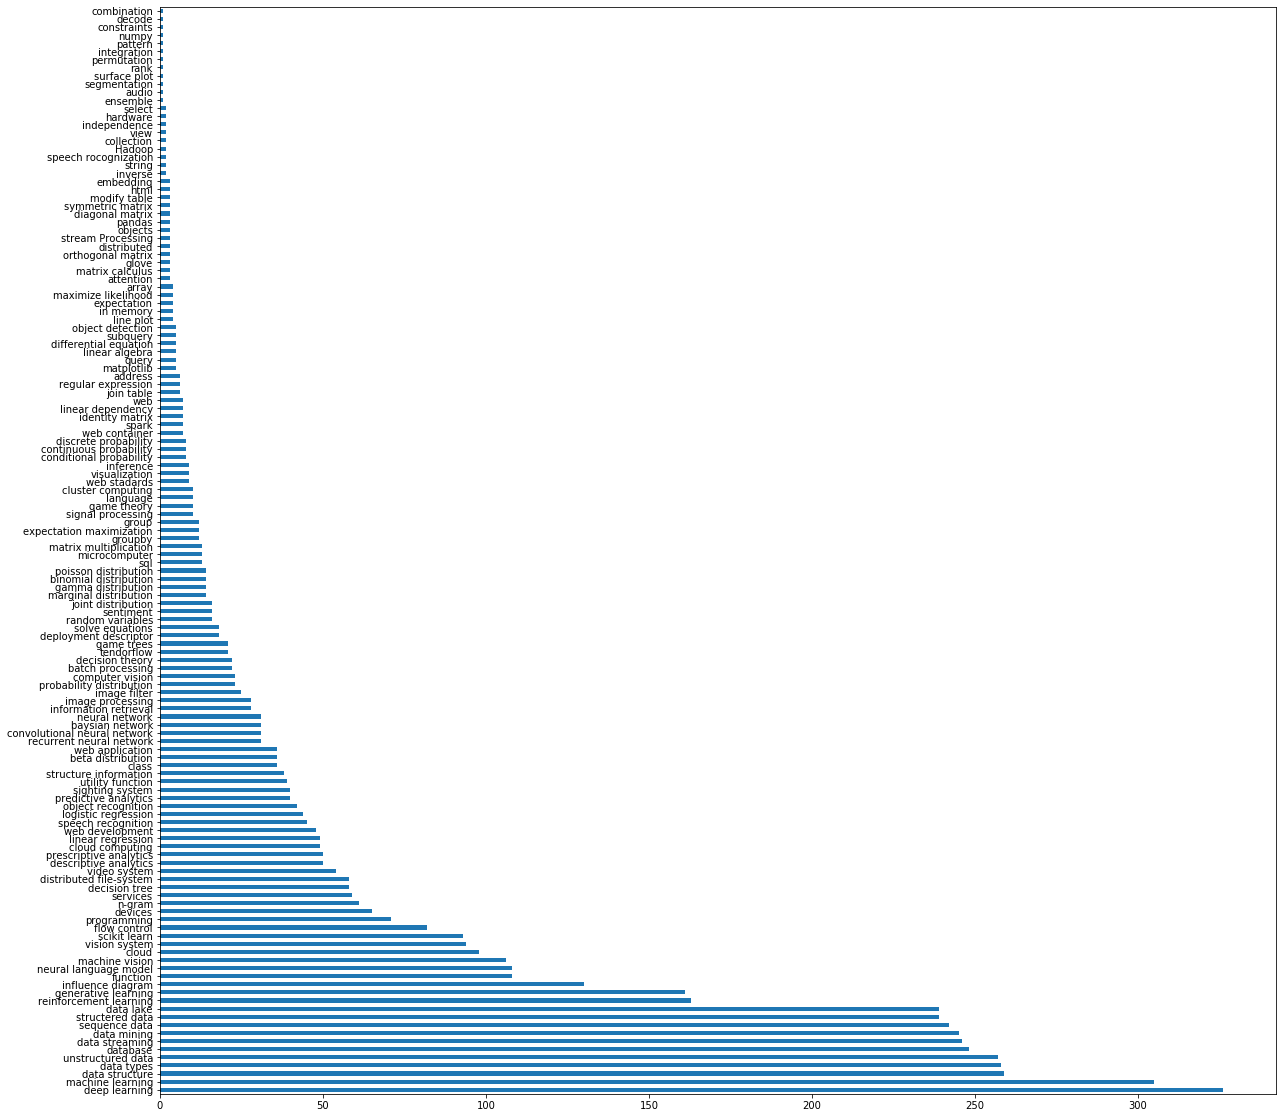

In [0]:
noisy_keys = []
for key_list in ai_data_with_keyword['keywords']:
    noisy_keys += key_list

realKeys = []
for key_list in list(topic_keywords_dict.values()):
    realKeys += key_list

Keys = []
for noisyKey in noisy_keys:
    for realKey in realKeys:
        if noisyKey in realKey:
            Keys.append(realKey)

pd.Series(Keys).value_counts().plot(kind='barh',figsize=(20,20))
plt.show()

##### 8. Applied Machine Learning

Machine learning brings together computer science and statistics to harness that predictive power. It’s a must-have skill for all aspiring data analysts and data scientists, or anyone else who wants to wrestle all that raw data into refined trends and predictions. This course will combine both the knowledge of computer science and statistics to provide you a foundamental understanding of machine learning algorithms and the mathematical proof of them(K Nearest Neighbors, linear regression, logistic regression, decision tree, ensembles, support vactor machine, multilayer perceptrons, convolutional neural networks) as well as demonstrate how these algorithms can help people analyze data in real life. In addition, optimization methods such as gradient descent, back-propagation in neural networks are also included in this course. Tool used in this course include python, tensorflow and pytorch.

**Procedure:**

For machine learning, we searched all keywords for courses that mentioned 'machine learning', to increase the documents returned, the segmented words 'machine' and 'learning' are also searched. This is equivalent to performing a OR search which is a common method in information retrieval for improving the results. All of the keywords returned are then plotted based on their frequency of occurance. The results have shown that, in Artificial Intelligence, 'deep learning','reinforcement learning', and 'generative learning' are the most popular topics within the machine learning compartment.

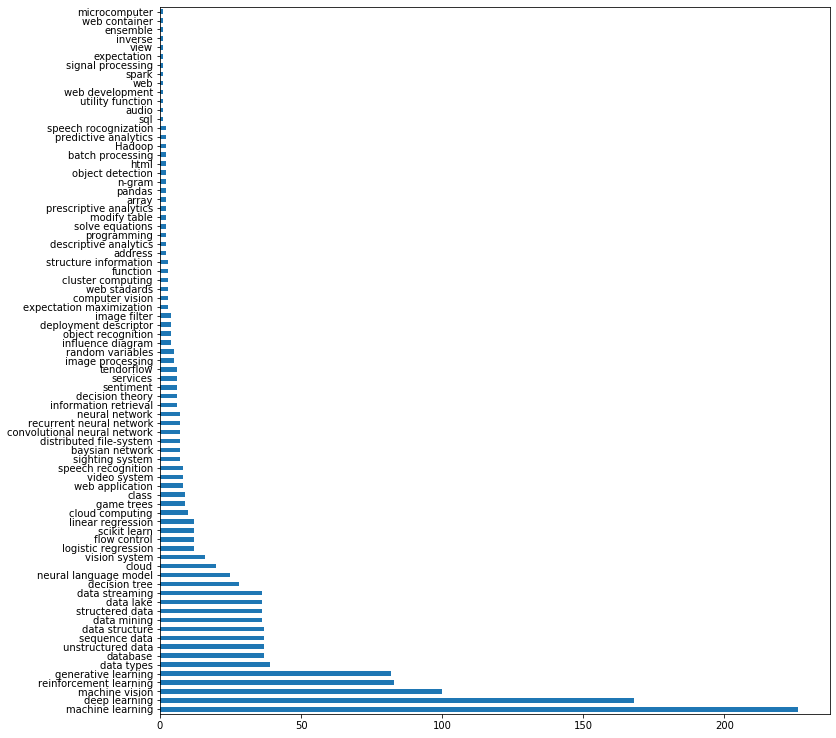

In [0]:
topics = ['machine learning','machine','learning']

keylists = ai_data_with_keyword['keywords'][courseExtract(topics, ai_data_with_keyword)]
L = []
for keylist in keylists:
    L += keylist

real_keys = []
for key_list in list(topic_keywords_dict.values()):
    real_keys += key_list

key = []
for noisyKey in L:
    for realKey in real_keys:
        if noisyKey in realKey:
            key.append(realKey)

pd.Series(key).value_counts().plot(kind='barh',figsize=(12,13))
plt.show()

##### 9. Introduction to Data Mining

This course will introduce the concepts of information retrieval and pattern discovery which are included in text mining areas. Students will learn the basic principles, and the major techniques in information retrieval from search engines by quickly discovering a small part of relevant text data in a large collection. Then students are introduced the methods to discover patterns in the text retrieved by clustering which includes all kinds of unsupervised machine learning method such as K-means, DBSCAN and OPTICS. In the final project, students are expected to do a text mining and pattern discovery on any topic they are interested in to help them improve their knowledge and skills.

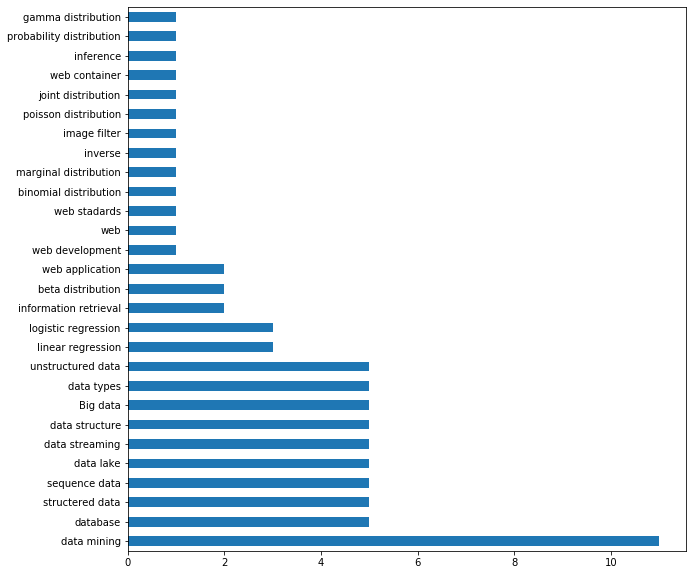

In [0]:
topics = ['data maning','mining']

keylists = ai_data_with_keyword['keywords'][courseExtract(topics, ai_data_with_keyword)]
L = []
for keylist in keylists:
    L += keylist

real_keys = []
for key_list in list(topic_keywords_dict.values()):
    real_keys += key_list

key = []
for noisyKey in L:
    for realKey in real_keys:
        if noisyKey in realKey:
            key.append(realKey)

pd.Series(key).value_counts().plot(kind='barh',figsize=(10,10))
plt.show()

##### 10. Introduction to Cloud Computing in Big Data

This course covers the basic ideas in cloud computing which include the concepts related to clouds, NoSQL databases, distributed file systems by firstly introduces the difficulties in storing and processing large scale of data in a industry level and then, the infrastructure of cloud system are covered by looking at the cloud systems in the big three companies: Amazon, google and Microsoft and comparing them. Finally, students will be introduced to a higher level cloud services with special focus on cloud storage services which includes topics in big data such as MapReduce, Spark, Cloudera and HDFS. The final project in this course will provide students the cloud and big data platform to implement machine learning algorithms on a large scale datasets.

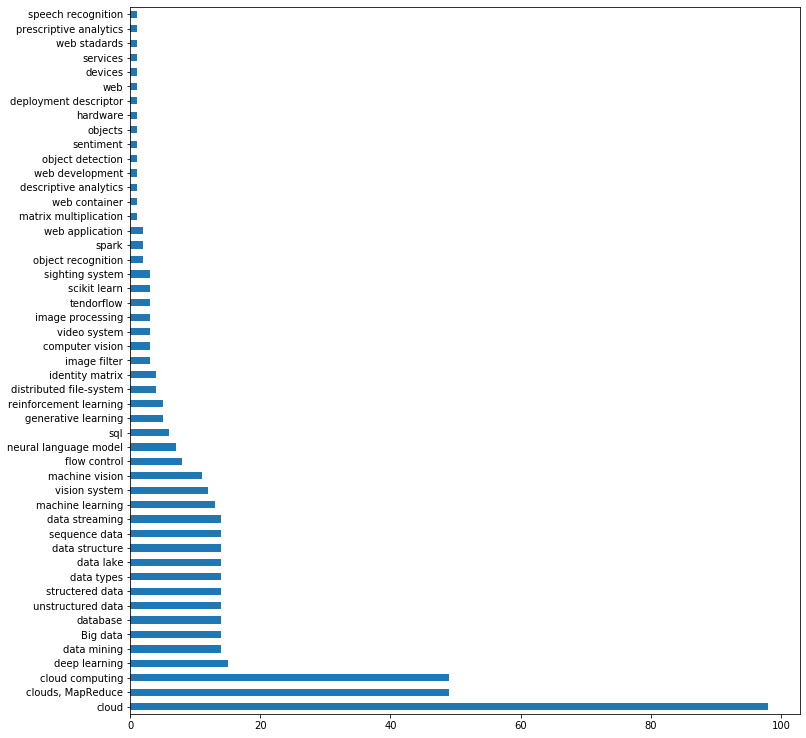

In [0]:
topics = ['cloud','cloud computing']

keylists = ai_data_with_keyword['keywords'][courseExtract(topics, ai_data_with_keyword)]
L = []
for keylist in keylists:
    L += keylist

real_keys = []
for key_list in list(topic_keywords_dict.values()):
    real_keys += key_list

key = []
for noisyKey in L:
    for realKey in real_keys:
        if noisyKey in realKey:
            key.append(realKey)

pd.Series(key).value_counts().plot(kind='barh',figsize=(12,13))
plt.show()

##### 11. Computer Vision

This course provides an introduction to computer vision including fundamentals of image formation, camera imaging geometry, feature detection and matching, multiview geometry including stereo, motion estimation and tracking, and classification. We focus on the machine learning aspect of computer vision, for example: using deep learning algoritms such as convolutional neural network on image data to extract features, detect and recognize objects.

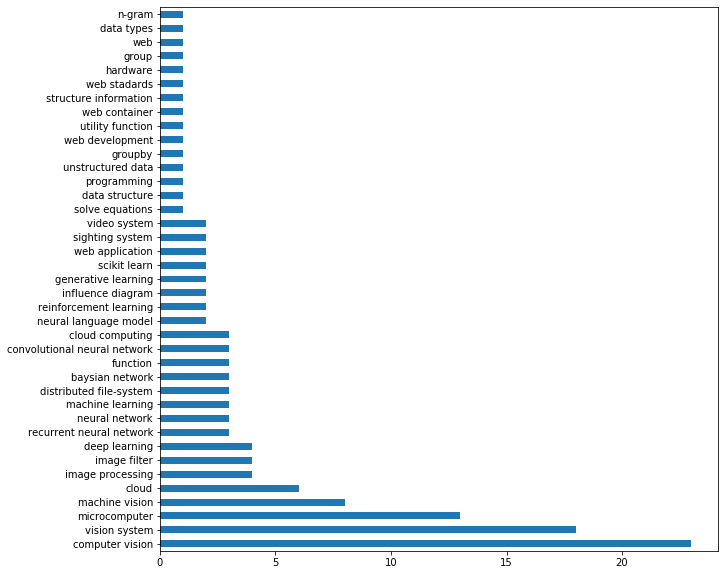

In [0]:
topics = ['computer vision','computer','vision']
keylists = ai_data_with_keyword['keywords'][courseExtract(topics, ai_data_with_keyword)]
L = []
for keylist in keylists:
    L += keylist

real_keys = []
for key_list in list(topic_keywords_dict.values()):
    real_keys += key_list

key = []
for noisyKey in L:
    for realKey in real_keys:
        if noisyKey in realKey:
            key.append(realKey)
pd.Series(key).value_counts().plot(kind='barh',figsize=(10,10))
plt.show()

##### 12. Decision Theory and Game Theory

This course provides a brief introduction to both decision theory and game theory and the different between them. Main focus in this course will be on the game theory which includes game trees, Bayesian models and repeated and stochastic games. Our main goal is to understand the basic ideas behind the key concepts in game theory and use mathematics to solve these problems. We will also see some classic games and applications related to the normal form, payoffs, strategies, pure strategy Nash equilibrium, dominant strategies. 

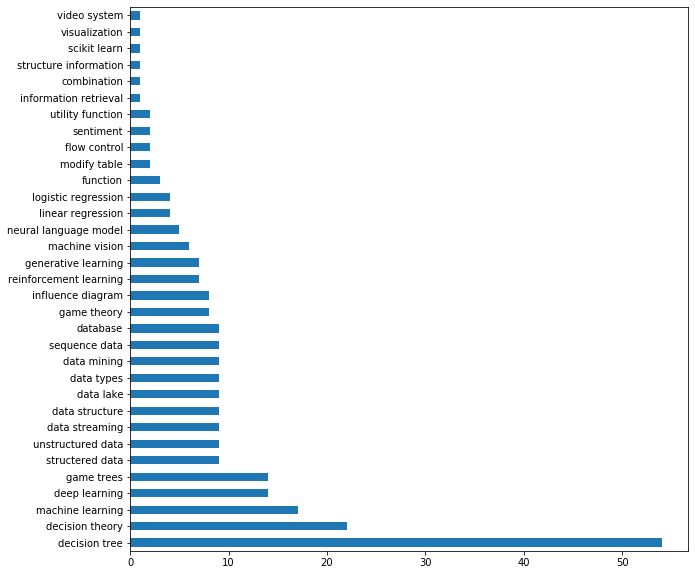

In [0]:
topics = ['decision theory','decision','theory']
keylists = ai_data_with_keyword['keywords'][courseExtract(topics, ai_data_with_keyword)]
L = []
for keylist in keylists:
    L += keylist

real_keys = []
for key_list in list(topic_keywords_dict.values()):
    real_keys += key_list

key = []
for noisyKey in L:
    for realKey in real_keys:
        if noisyKey in realKey:
            key.append(realKey)
pd.Series(key).value_counts().plot(kind='barh',figsize=(10,10))
plt.show()

##### 13. Reinforcement Learning

This course will introduce basic concepts of reinforcement learning anf its relationship with decision-making and AI. Students will learn how an agent works, Markov Decision Process, value functions, exploration and exploitation tradeoff and other basic topics in reinforcement learning. For the rest of this course, students get a basic knowledge on how an agent is learning from its own experience by using methods like Monte Carlo simulation, temporal difference in Q-learnin and also a function approxiamtion method. In the final project, students are expected to complete a reinforcement learning problem in real life which includes  problem formulation, algorithm selection, parameter selection and other components.

### 2.4.3 Business Analytics

**Procedure:**

The general approach for obtaining the course sections and topics for business analysis is very similar as the artificial intelligence section. However, different keyword corpus must be used since it is not likely for a business course to mention topics from computer vision. Therefore, a different set of keywords are fed in to the model, with the results sorted and plotted, we then define the main sections for this part of the lecture: Project management, Risk Management, and Business Intelligence.

In [0]:
ba_data = pd.read_csv('university_courses.csv',index_col=0)
ba_data_with_keyword = K_Keywords(original_df = ba_data, 
                    Q_list = cleanSTR(ba_data['courses_description']),
                    corpus = [],
                    keyword_dict = ba_keywords,
                    K=10)

---Corpus Built---
---Corpus Fited via TFIDF---


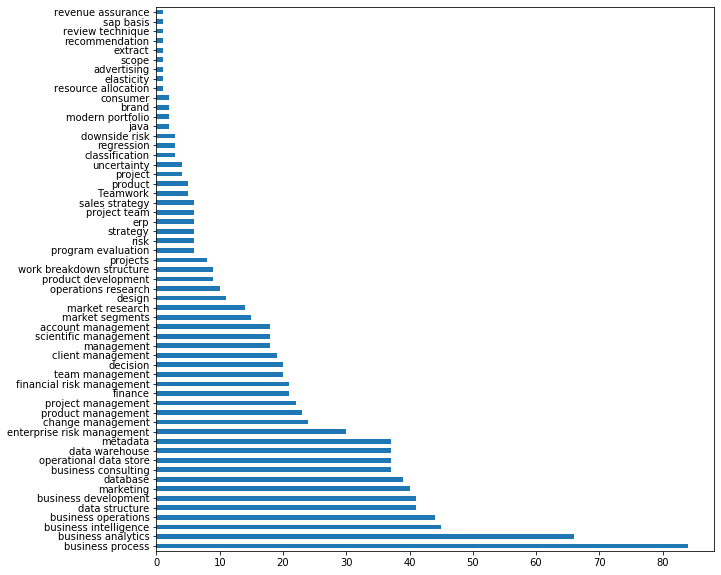

In [0]:
noisy_keys = []
for key_list in ba_data_with_keyword['keywords']:
    noisy_keys += key_list

realKeys = []
for key_list in list(ba_keywords.values()):
    realKeys += key_list

Keys = []
for noisyKey in noisy_keys:
    for realKey in realKeys:
        if noisyKey in realKey:
            Keys.append(realKey)

pd.Series(Keys).value_counts().plot(kind='barh',figsize=(10,10))
plt.show()

##### 14. Fundamentals of Project Management 

This course helps students identify factors that lead to project success, and learn how to plan, analyze, and manage project in practice. Students will gain a strong working knowledge of the basics of project management and be able to immediately use that knowledge to effectively manage projects in their future career. After this course, students will know how to plan a project, save budget on it and how to allocate resources properly. A real project in this course will give students the skills to ensure projects are completed on time and on budget while giving the user the product they expect. 

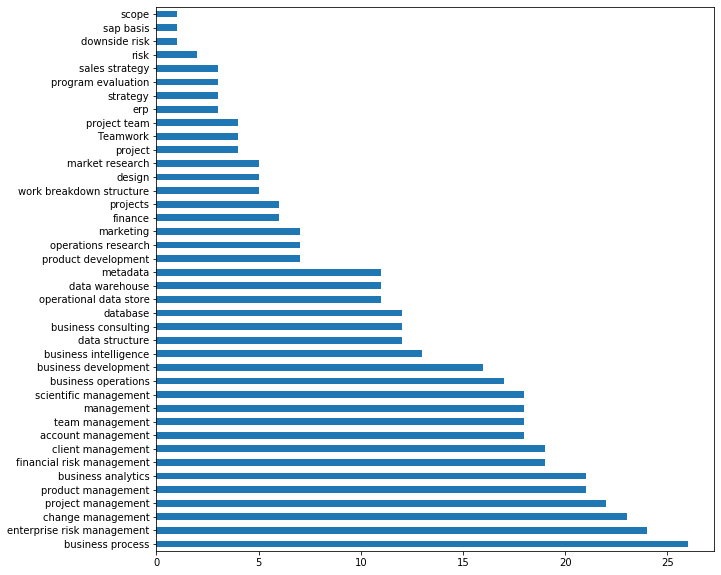

In [0]:
topics = ['project management','project', 'management','development','project development']
keylists = ba_data_with_keyword['keywords'][courseExtract(topics, ba_data_with_keyword)]
L = []
for keylist in keylists:
    L += keylist

real_keys = []
for key_list in list(ba_keywords.values()):
    real_keys += key_list

key = []
for noisyKey in L:
    for realKey in real_keys:
        if noisyKey in realKey:
            key.append(realKey)
pd.Series(key).value_counts().plot(kind='barh',figsize=(10,10))
plt.show()

##### 15. Financial Risk Management

This course combines the knowledge of finance and economics, mathematics, statistics, engineering and computational methods all together. Students will gain an understanding of the theory underlying optimal portfolio construction, the different ways portfolios are actually modelled in reality and how to measure and manage the risk of such portfolios. This course will also introduce students sources of risks in financial environment and ways to measure them such as Value-at-Risk and Expected Shortfall. Assignments as the important evaluations will help students to gain not only technical skills on building and optimizing models in Python but also analytical thinking skills in a financial perspective.

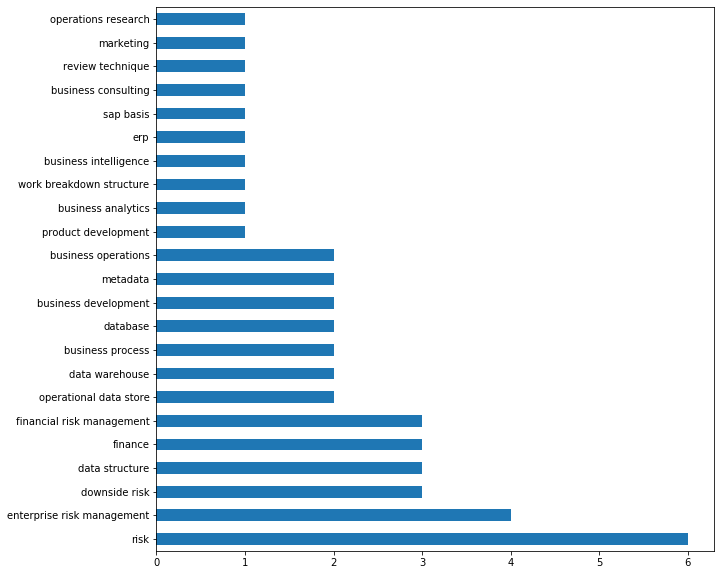

In [0]:
topics = ['risk management','risk']
keylists = ba_data_with_keyword['keywords'][courseExtract(topics, ba_data_with_keyword)]
L = []
for keylist in keylists:
    L += keylist

real_keys = []
for key_list in list(ba_keywords.values()):
    real_keys += key_list

key = []
for noisyKey in L:
    for realKey in real_keys:
        if noisyKey in realKey:
            key.append(realKey)
pd.Series(key).value_counts().plot(kind='barh',figsize=(10,10))
plt.show()

##### 16.  Data Warehousing for Business Intelligence

This course covers data architecture skills. Students will learn the basics of structured data modeling, gain SQL coding experience, know the basics of data warehouse and data manipulation. Students will have the opportunity to work with large datasets in a data warehouse environment to create dashboards and visual analysis by using MicroStrategyonline analytical processing tool and Visual Insights. A final Capstone Project will be the only evaluation and students will apply all skills learnt in this course to build a small, basic data warehouse, analysing and insights, and create dashboards and other visualizations and communicate the data to a group of audience at the end of the semester.

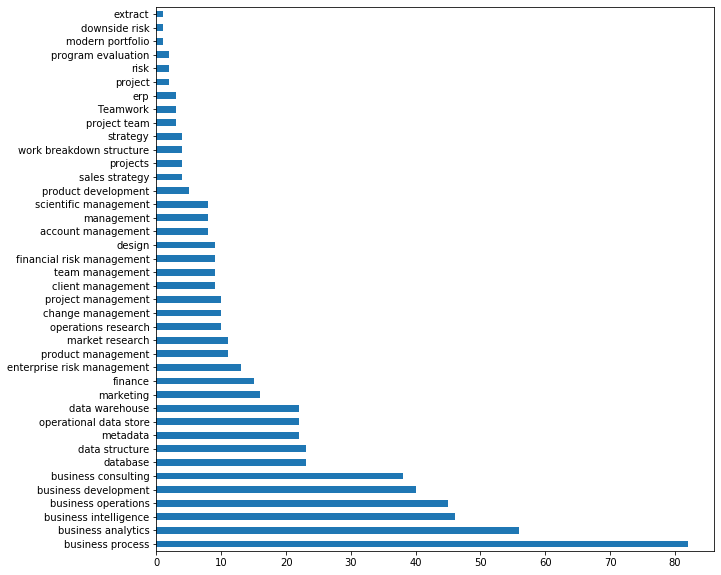

In [0]:
topics = ['business intelligence','business','intelligence']
keylists = ba_data_with_keyword['keywords'][courseExtract(topics, ba_data_with_keyword)]
L = []
for keylist in keylists:
    L += keylist

real_keys = []
for key_list in list(ba_keywords.values()):
    real_keys += key_list

key = []
for noisyKey in L:
    for realKey in real_keys:
        if noisyKey in realKey:
            key.append(realKey)
pd.Series(key).value_counts().plot(kind='barh',figsize=(10,10))
plt.show()

##### 17. Analytics in Marketing

This course will give students ideas that make marketing decisions by combining both marketing principles and data analysis and let them become a data-driven profession that relies on quantitative insights. This course will examine the ways in which marketing has changed and students need to use data answer marketing questions such as the target market segment, the position of product, the most effective way to advertise and the best products to recommend to customers. At the last month of this course,  students will be introduced some advanced machine learning and deep learning methods used in recent marketing strategies such as natural language processing and they will practice the skills on a real-world datasets and give out some good marketing strategies based on what they have learned.

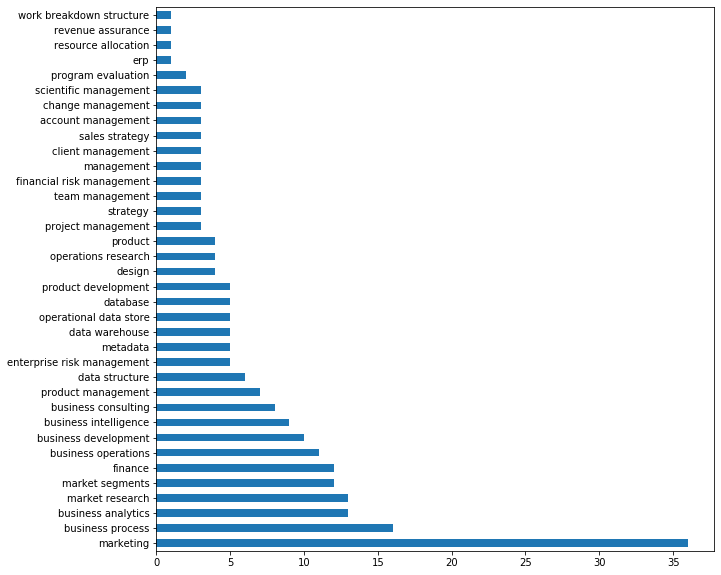

In [0]:
topics = ['marketing modelling','market']
keylists = ba_data_with_keyword['keywords'][courseExtract(topics, ba_data_with_keyword)]
L = []
for keylist in keylists:
    L += keylist

real_keys = []
for key_list in list(ba_keywords.values()):
    real_keys += key_list

key = []
for noisyKey in L:
    for realKey in real_keys:
        if noisyKey in realKey:
            key.append(realKey)
pd.Series(key).value_counts().plot(kind='barh',figsize=(10,10))
plt.show()

##### 18. Managing Change

As the environment of many business becomes increasingly complex and unstable, it is imperative that top managers be able to successfully manage the flexibility in their operations and lives.  Organizations must be able to undertake major change without destructive side effects to be truly successful. Students will learn how to re-imagine change by redefining the change problem and developing the right mindset to influence how change affects the organizations. This course uses real case studies to help students to learn and understand the real strategies or methods used in companies and other organizations.

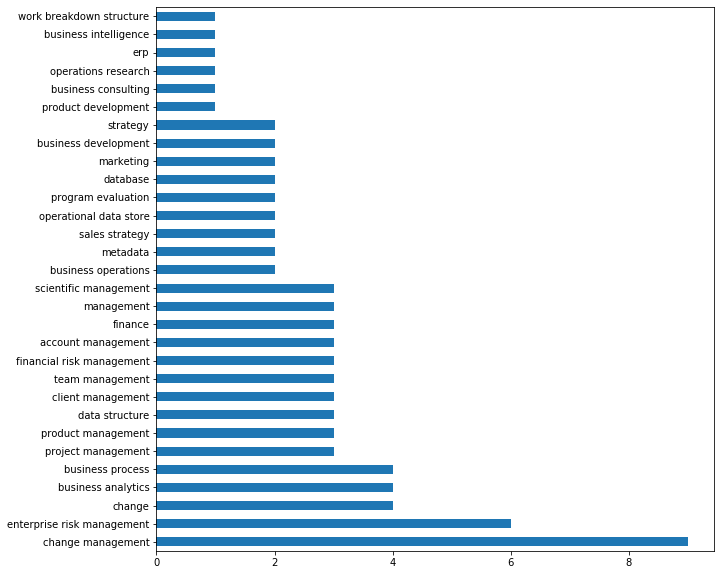

In [0]:
topics = ['change','change management']
keylists = ba_data_with_keyword['keywords'][courseExtract(topics, ba_data_with_keyword)]
L = []
for keylist in keylists:
    L += keylist

real_keys = []
for key_list in list(ba_keywords.values()):
    real_keys += key_list

key = []
for noisyKey in L:
    for realKey in real_keys:
        if noisyKey in realKey:
            key.append(realKey)
pd.Series(key).value_counts().plot(kind='barh',figsize=(10,10))
plt.show()

##### 19. Leadership and Management

This course is designed to let students to get experience in practicing everyday leadership, managing people and organizations effectively through organizational design, and formulate and implement strategy. Students will have opportunity to practice and develop their analytical thinking skills, presentation skills and time, conflict and stress management which are necessary skills in their daily lives or future career. The final project is a strategic leadership and management plan where students are expected to have a real business situation with a partner from companies which will get in their business career earlier before graduating.

##### 20. Prescriptive analytics and Recomendation System

This course using data to discover patterns or buying behaviors in purchasings from customers and building recommendation system for them to improve transactions online and help company make decisions to boost sales. Students will firstly learn how to extract useful data to study customers' buying behaviors and interpret data to make better decisions, them they will learn how to use data about actions in the past to make predictions about actions in the future by predictive models. In the final project, students are expected to implement what they have learned in this class to analyse the pattern in customers and build a predictive model and/or recommendation system to help company to boost sales.

## 2.5 Project & Internship & Extra-Curricular Activities

In the last semester, students must complete a 4-month internship. The internship is aimed for helping students develop real-life data science or artificial intelligence problem solving skills. A Student can either find an industrial-based or research-based internship as long as the responsibilities are closely related with data science or artificial intelligence. During the internship, student must participate in a project and use professional tools (such as SPSS, SAS etc.) to solve problems. A report summarizing the problem-solving procedures should be submitted after the internship. 

# Part 4. Recommendation System for Course Selection

In [0]:
# built-in libs
# !pip install whoosh
# !pip install pytrec_eval
import json, re 
# data analysis libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from whoosh import index, writing
from whoosh.fields import Schema, TEXT, KEYWORD, ID, STORED
from whoosh.analysis import *
from whoosh.qparser import QueryParser
from whoosh import qparser#used in Q4
from whoosh import scoring#used in Q4
import os, os.path
from pathlib import Path
import tempfile
import subprocess
import pytrec_eval
import nltk
from nltk.stem import *
from whoosh.analysis import Filter
from whoosh import qparser

# from difflib import SequenceMatcher

## 4.1 Introduction

In this part 4, we would use build a recommender system to help suer/student to select courses based on thier demands. The demand could come from the job requirement, and their own interest. Students may come from different department who are interest on data science and excited to find a career related to data science. They may not have suffcient technical skill, and management skill to fit the requirement of data scientist jobs. Therefore, this recommender system bring a insight of helping student make up their missing skills, and gain competitiveness in data science field.  

For example, if a student want to find a job name data engieer. The job require python, data mining skill,visualization data, sql and hadoop. Then, this system need student to consider what skills they lack and what skills they want to improve. Next, fill the questionnaire for the recommender system to get the recommending courses. 



## 4.2 Upload online course/section description, elective couse and UofT course

Our database are obtained from the most popular online course, the elective courses from the UofT Emphasis in Analytics, and courses from our designed program.

In [0]:
# uoft course
uoft_data=pd.read_csv('Course_Analytics_Emphasis.csv',index_col=0)
# course designed by our group
own_data=pd.read_csv('Designed_course.csv',index_col=0)

own_data=own_data.reset_index()
uoft_data=uoft_data.dropna()
uoft_data=uoft_data.reset_index()

In [0]:
# business course 
university_bs_data=pd.read_csv("university_courses.csv",index_col=0)
bs_data=pd.read_csv("chapter_topics_ba.csv",index_col=0)

#technical courses
coursera_tech_data=pd.read_csv("chapter_topics.csv",index_col=0)
datacamp_data = pd.read_csv("datacamp.csv",index_col=0)
#
sql_data=pd.read_csv("chapter_topics_sql.csv",index_col=0)
big_data=pd.read_csv('chapter_topics_bigdata.csv',index_col=0)
java_data=pd.read_csv("chapter_topics_java.csv",index_col=0)
la_data=pd.read_csv('chapter_topics_la.csv',index_col=0)
nlp_data=pd.read_csv("chapter_topics_nlp.csv",index_col=0)
python_data=pd.read_csv("chapter_topics_python.csv",index_col=0)
scala_data=pd.read_csv("chapter_topics_scala.csv",index_col=0)
stats_data=pd.read_csv("chapter_topics_stats.csv",index_col=0)

#AI
AI_data=pd.read_csv("chapter_topics_ai.csv")



In [0]:
df_all_course=pd.concat([university_bs_data[['course','courses_description']].rename(columns={"course": "Course Names", "courses_description": "Course Descriptions"}),\
                        bs_data[['Course Names','Course Descriptions',"Chapter Links"]],\
                        coursera_tech_data[['Course Names','Course Descriptions',"Chapter Links"]],\
                        datacamp_data[['Course Names','Course Descriptions']],\
                        sql_data[['Course Names','Course Descriptions',"Chapter Links"]],\
                        big_data[['Course Names','Course Descriptions',"Chapter Links"]],\
                        java_data[['Course Names','Course Descriptions',"Chapter Links"]],\
                        la_data[['Course Names','Course Descriptions',"Chapter Links"]],\
                        nlp_data[['Course Names','Course Descriptions',"Chapter Links"]],\
                        python_data[['Course Names','Course Descriptions',"Chapter Links"]],\
                        scala_data[['Course Names','Course Descriptions',"Chapter Links"]],\
                        stats_data[['Course Names','Course Descriptions',"Chapter Links"]],\
                        AI_data[['Course Names','Course Descriptions',"Chapter Links"]]],sort=False,ignore_index=True)



In [0]:
# business course 
s_bs_data=pd.read_csv("section_topics_ba.csv",index_col=0)

#technical courses
s_coursera_tech_data=pd.read_csv("section_topics.csv",index_col=0)
#
s_sql_data=pd.read_csv("section_topics_sql.csv",index_col=0)
s_big_data=pd.read_csv('section_topic_bigdata.csv',index_col=0)
s_java_data=pd.read_csv("section_topics_java.csv",index_col=0)
s_la_data=pd.read_csv('section_topics_la.csv',index_col=0)
s_nlp_data=pd.read_csv("section_topics_nlp.csv",index_col=0)
s_python_data=pd.read_csv("section_topics_python.csv",index_col=0)
s_scala_data=pd.read_csv("section_topics_scala.csv",index_col=0)
s_stats_data=pd.read_csv("section_topics_stats.csv",index_col=0)

#AI
s_AI_data=pd.read_csv("section_topics_ai.csv")



In [0]:
df_all_section=pd.concat([s_bs_data[['Section Names','Section Descriptions','Chapter Links']],\
                        s_coursera_tech_data[['Section Names','Section Descriptions','Chapter Links']],\
                        s_sql_data[['Section Names','Section Descriptions','Chapter Links']],\
                        s_big_data[['Section Names','Section Descriptions','Chapter Links']],\
                        s_java_data[['Section Names','Section Descriptions','Chapter Links']],\
                        s_la_data[['Section Names','Section Descriptions','Chapter Links']],\
                        s_nlp_data[['Section Names','Section Descriptions','Chapter Links']],\
                        s_python_data[['Section Names','Section Descriptions','Chapter Links']],\
                        s_scala_data[['Section Names','Section Descriptions','Chapter Links']],\
                        s_stats_data[['Section Names','Section Descriptions','Chapter Links']],\
                        s_AI_data[['Section Names','Section Descriptions','Chapter Links']]],sort=False,ignore_index=True)




## 4.3 Build Information Retrieval (IR)
The core of recommer system is to build an information retrieval function. Information retrieval (IR) is finding material (usually documents) of an unstructured nature (usually text) that satisfies an information need from within large collections. The core is to use Whoosh, which is a library of classes and functions for indexing text and then searching the index. It allows you to develop custom search engines for your content. Here, the process is to filter the stop word, lower case all the word, stemming the word, and then tokenizer each word to be a token. Then, we need to index each token, and store the file locally. In this part, we need to index the online course description, detailed section of each course, UofT courses, and courses designed by us

In [0]:
Analyzer = RegexTokenizer() | LowercaseFilter() | IntraWordFilter() | StopFilter() | StemFilter()


#%%
# import data into pandas df and create index schema

online_course = pd.DataFrame(df_all_course,copy=True)
schema = Schema(path = ID(stored=True),
                link = ID(stored=True),
                title = TEXT (stored = True),
                text = TEXT(analyzer = Analyzer))

#%%
# create and populate index
def populate_index(dirname, dataframe, schema):
    # Checks for existing index path and creates one if not present
    if not os.path.exists(dirname):
        os.mkdir(dirname)
    print("Creating the Index")
    ix = index.create_in(dirname, schema)
    with ix.writer() as writer:
        # Imports stories from pandas df
        print("Populating the Index")
        for i in dataframe.index:
            add_stories(i, dataframe, writer)
    
def add_stories(i, dataframe, writer):   
    writer.update_document(path= str(dataframe.index[i]),
                           link=str(dataframe.loc[i, "Chapter Links"]),
                           title = str(dataframe.loc[i, "Course Names"]),
                           text = str(dataframe.loc[i, "Course Descriptions"]))
                           


              
## build a index file 
populate_index("online_course_Index", online_course, schema)




Creating the Index
Populating the Index


In [0]:

#%%
# import data into pandas df and create index schema


schema = Schema(path = ID(stored=True),
                link = ID(stored=True),
                title = TEXT (stored = True),
                text = TEXT(analyzer = Analyzer))

#%%
# create and populate index
def populate_index_1(dirname, dataframe, schema):
    # Checks for existing index path and creates one if not present
    if not os.path.exists(dirname):
        os.mkdir(dirname)
    print("Creating the Index")
    ix = index.create_in(dirname, schema)
    with ix.writer() as writer:
        # Imports stories from pandas df
        print("Populating the Index")
        for i in dataframe.index:
            add_stories_1(i, dataframe, writer)
    
def add_stories_1(i, dataframe, writer):   
    writer.update_document(path= str(dataframe.index[i]),
                           link=str(dataframe.loc[i, "Chapter Links"]),
                           title = str(dataframe.loc[i, "Section Names"]),
                           text = str(dataframe.loc[i, "Section Descriptions"]))
                           
              
## build a index file 
populate_index_1("online_section_Index", df_all_section, schema)




Creating the Index
Populating the Index


In [0]:
schema = Schema(path = ID(stored=True),
                title = TEXT (stored = True),
                text = TEXT(analyzer = Analyzer))

#%%
# create and populate index
def populate_index_2(dirname, dataframe, schema):
    # Checks for existing index path and creates one if not present
    if not os.path.exists(dirname):
        os.mkdir(dirname)
    print("Creating the Index")
    ix = index.create_in(dirname, schema)
    with ix.writer() as writer:
        # Imports stories from pandas df
        print("Populating the Index")
        for i in dataframe.index:
            add_stories_2(i, dataframe, writer)
    
def add_stories_2(i, dataframe, writer): 

    writer.update_document(path= str(dataframe.index[i]),
                           title = str(dataframe.loc[i, "Course Names"]),
                           text = str(dataframe.loc[i, "Course Descriptions"]))
                           
              
## build a index file 
populate_index_2("uoft_course_Index", uoft_data, schema)

populate_index_2("own_course_Index", own_data, schema)



Creating the Index
Populating the Index
Creating the Index
Populating the Index


## 4.4 Build Recommendation System

Here, we need to build a search function. The function need to find the most related courses to a quary. The quary is obtained from students' demand. The difficulty of this part is to choose the proper scoring method, and searching method. We want our recommendation system can provide the courses containing more useful information, and try to cover more demand of the student. Therefore, we choose to use OrGroup method as search method, and implements the BM25F scoring algorithm. The OrGroup method is to choose the course if any keyword appear in. Therefore, it will help us select many related course.Then, we choose BM25 to find the top ranking courses. BM25 is a bag-of-words retrieval function that ranks a set of documents based on the query terms appearing in each document, regardless of their proximity within the document.

In [0]:
#%%
# creates index searcher
def index_search(dirname, search_fields, search_query):
    ix = index.open_dir(dirname)
    schema = ix.schema
    # Create query parser that looks through designated fields in index

    og = qparser.OrGroup.factory(0.8)
#     group = og
    mp = qparser.MultifieldParser(search_fields, schema,group = og)

    # This is the user query
    q = mp.parse(search_query)
    path_list=[]
    course_list=[]
    link_list=[]
    # open the searcher 
    s= ix.searcher()
    # Actual searcher, prints top 20 hits. chooose the top 20 course.
    results = s.search(q, limit = 30,terms=True)
    for (docnum, result) in enumerate(results):
        #score = results.score(docnum)
        path_list.append(result["path"])
        course_list.append(result["title"])
        link_list.append(result["link"])
    
    
    return path_list,course_list,link_list

def index_search_1(dirname, search_fields, search_query):
    ix = index.open_dir(dirname)
    schema = ix.schema
    # Create query parser that looks through designated fields in index

    og = qparser.OrGroup.factory(0.8)
#     group = og
    mp = qparser.MultifieldParser(search_fields, schema,group = og)

    # This is the user query
    q = mp.parse(search_query)
    path_list=[]
    course_list=[]
    # open the searcher 
    s= ix.searcher()
    # Actual searcher, prints top 20 hits. chooose the top 20 course.
    results = s.search(q, limit = 5,terms=True)
    for (docnum, result) in enumerate(results):
        #score = results.score(docnum)
        path_list.append(result["path"])
        course_list.append(result["title"])  
    
    return path_list,course_list
def present_result(dirname, search_fields, search_query,df_original):
    path,course,link=index_search(dirname, search_fields, search_query)
    df=pd.DataFrame(list(zip(path,course,link)),columns=["path","course","link"])
    df=df.drop_duplicates(subset=['course'])
    index=df['path'].tolist()
    df_=df_original.iloc[index]
    return df_
def present_result_1(dirname, search_fields, search_query,df_original):
    path,course=index_search_1(dirname, search_fields, search_query)
    df=pd.DataFrame(list(zip(path,course)),columns=["path","course"])
    df=df.drop_duplicates(subset=['course'])
    index=df['path'].tolist()
    df_=df_original.iloc[index]
    return df_

In [0]:
survey_list=[]

### 4.4.1 test for search topic related course
Here, we do a little test for our recommer system. First, the query is "natural language processing and python". And then, it gives us the suggested couresd name, course description and website link for us to search. From the result, we can see the recommer system works. The course give back all related to the natural language processing.

In [0]:
df=present_result("online_course_Index", ['text'], u"natural language processing and python",df_all_course)
df

,Course Names,Course Descriptions,Chapter Links
1158,Introduction to Natural Language Processing in R,"As with any fundamentals course, Introduction ...",NaN
68,NATURAL LANGUAGE PROCESSING,This course focuses on the principles and tech...,NaN
57,ARTIFICIAL INTELLIGENCE FUNDAMENTALS,This course introduces students to the field o...,NaN
413,Deep Learning Specialization,"If you want to break into AI, this Specializat...",https://www.coursera.org/learn/neural-networks...
171,Python for Everybody Specialization,This Specialization builds on the success of t...,https://www.coursera.org/learn/python?speciali...


## 4.5 Questionnaire for student 

We list five question to ask for some information of the user, and help them to find the neede courses. First, the recommender system want to know what kind of job uses look for. Then, what programming language the job requires, or the user like to use. Next, what skills the user want. After that, management skills are also very important for a job. At last, the users can add any skills and knowledge they want to learn. In each question, users can select to a single choice, or multiply choice. The recommender system will help them to find all related high ranking courses.

In [0]:
##empty first
survey_list=[]

#### Question 1: What kind of job do you want to find? (eg. big data, machine learning, natural language processing, ex..)


In [0]:
keyword=input()
survey_list.append(keyword)

big data


#### Question 2: what kind of programming language do you want to learn? (eg. python, java, R, SQL, ex..)

In [0]:
keyword=input()
survey_list.append(keyword)

python


#### Question 3: What kind of skills do you need to learn for your future career? (eg. visualization, mathematics, SAS, ...ex )

In [0]:
keyword=input()
survey_list.append(keyword)

visualization


#### Question 4: What kind of management ability do you need to learn for your future career? (eg. decision making, teamwork, presentation,...ex )

In [0]:
keyword=input()
survey_list.append(keyword)

presentation


#### Question 5: What else knowledge do you want to learn to improve yourself? (eg. you can type nothing or linear optimization ex.. )

In [0]:
keyword=input()
survey_list.append(keyword)

leadership


In [0]:
survey_list=survey_list
survey_list=str(survey_list).lower()

In [0]:
survey_list

"['big data', 'python', 'visualization', 'presentation', 'leadership']"

## 4.6 Recommender System Results  (Recommended courses)

### 4.6.1 From Online Courses 

In [0]:
df=present_result("online_course_Index", ['text'], survey_list,df_all_course)
df


,Course Names,Course Descriptions,Chapter Links
1150,Interactive Data Visualization with Bokeh,Bokeh is an interactive data visualization lib...,NaN
135,Data Visualization with Tableau Specialization,In 2020 the world will generate 50 times the a...,https://www.coursera.org/learn/data-visualizat...
344,Applied Data Science Specialization,This is an action-packed specialization is for...,https://www.coursera.org/learn/python-for-appl...
289,Data Science at Scale Specialization,"Learn scalable data management, evaluate big d...",https://www.coursera.org/learn/data-manipulation


### 4.6.2 From detailed section of online courses
This part, we look for useful course from each section of each online course. This can help student release learning load, and save more time to learn

In [0]:
df=present_result("online_section_Index", ['text'], survey_list,df_all_section)
df

,Section Names,Section Descriptions,Chapter Links
946,Leadership’s Role in Analytics with Florian Ze...,Why the data explosion in marketing has made a...,https://www.coursera.org/learn/leadership-mark...
861,Module 2: ​Big ​Data ​Tools ​Overview,Learn what are the key big data tools on Googl...,https://www.coursera.org/learn/gcp-exploring-p...
2731,Storing and Exporting Data,Learn what are the key big data tools on Googl...,https://www.coursera.org/learn/gcp-creating-bi...
4954,Module 1: Introduction ​to ​Data ​on Google ​C...,Learn what are the key big data tools on Googl...,https://www.coursera.org/learn/gcp-exploring-p...
3238,Summarising Data,Charts are one of the most common ways to pres...,https://www.coursera.org/learn/excel-intermedi...
162,Data Visualization,This week we are going to focus on data visual...,https://www.coursera.org/learn/advanced-excel?...
2689,Delivering a presentation,This week we are going to focus on data visual...,https://www.coursera.org/learn/powerpoint-pres...
5204,Advanced Scenario Analysis,This week we are going to focus on data visual...,https://www.coursera.org/learn/advanced-excel?...
1151,R Markdown and Leaflet,"In this module, we'll dive into the world of c...",https://www.coursera.org/learn/data-products
7496,R Packages,"In this module, we'll dive into the world of c...",https://www.coursera.org/learn/data-products?s...


### 4.6.3 From UofT elective courses at Emphasis in Analytic
we can see MIE 1624 is a very useful course to learn

In [0]:
df=present_result_1("uoft_course_Index", ['text'], survey_list,uoft_data)
df

,Course Names,Course Descriptions
1,MIE 1624H Introduction to Data Science and Ana...,The objective of the course is to learn analyt...
31,MIE1628H: Big Data Science,This course is designed to provide students wi...
11,CHE1147H: Data Mining in Engineering,An exceptional ability to deal with data is th...
26,MIE 1413H: Statistical Models in Empirical Res...,This course covers various statistical models ...
14,CIV 1506H: Freight Transportation and ITS Appl...,Efficient movement of freight is crucial for n...


### 4.6.4 From Our designed program courses

In [0]:

df=present_result_1("own_course_Index", ['text'], survey_list,own_data)
df

,Course Names,Course Descriptions
3,Big Data Science,You will gain an understanding of what insight...
15,Data Warehousing for Business Intelligence,This course covers data architecture skills. S...
9,Introduction to Cloud Computing in Big Data,This course covers the basic ideas in cloud co...
18,Leadership and Management,This course is designed to let students to get...
5,Excel for Business,This course is desgined to wo kinds of learner...
